In [515]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from fast_ml.model_development import train_valid_test_split
from yellowbrick.cluster import KElbowVisualizer
from imblearn.over_sampling import SMOTE


#Default theme
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1,
              color_codes=True,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'


In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 3)

In [575]:
df = pd.read_csv("allseasons_09_19.csv")

In [351]:
df.info()
team_stats_df = pd.read_excel("Team statistics.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 74 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Div          3800 non-null   object 
 1   Season       3800 non-null   object 
 2   Date         3800 non-null   object 
 3   HomeTeam     3800 non-null   object 
 4   AwayTeam     3800 non-null   object 
 5   FTHG         3800 non-null   int64  
 6   FTAG         3800 non-null   int64  
 7   FTR          3800 non-null   object 
 8   HTHG         3800 non-null   int64  
 9   HTAG         3800 non-null   int64  
 10  HTR          3800 non-null   object 
 11  HS           3800 non-null   int64  
 12  AS           3800 non-null   int64  
 13  HST          3800 non-null   int64  
 14  AST          3800 non-null   int64  
 15  HF           3800 non-null   int64  
 16  AF           3800 non-null   int64  
 17  HC           3800 non-null   int64  
 18  AC           3800 non-null   int64  
 19  HY    

In [576]:
total_teams_df = pd.read_csv("total_teams.csv")

In [577]:
df.head()

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,SP1,Season-09/10,29/08/2009,Real Madrid,La Coruna,3,2,H,2,1,...,2.53,19.0,0.0,9.00,1.92,11.00,8.69,NaN,NaN,NaN
1,SP1,Season-09/10,29/08/2009,Zaragoza,Tenerife,1,0,H,0,0,...,1.79,18.0,0.0,1.38,1.36,3.20,3.01,NaN,NaN,NaN
2,SP1,Season-09/10,30/08/2009,Almeria,Valladolid,0,0,D,0,0,...,1.74,19.0,0.0,1.62,1.54,2.54,2.41,NaN,NaN,NaN
3,SP1,Season-09/10,30/08/2009,Ath Bilbao,Espanol,1,0,H,0,0,...,1.74,19.0,0.0,1.66,1.58,2.47,2.30,NaN,NaN,NaN
4,SP1,Season-09/10,30/08/2009,Malaga,Ath Madrid,3,0,H,1,0,...,1.96,18.0,0.0,2.60,2.45,1.58,1.51,NaN,NaN,NaN


In [578]:
null_check = df.isna().sum()

In [579]:
#removing the colums having missing values 60% and above
missing_percent = []
for column in df.iloc[:,60:]:
   missing_percent.append(df[column].isna().sum()/len(df[column])*100)
print(missing_percent)

[0.2631578947368421, 0.2894736842105263, 10.31578947368421, 10.31578947368421, 10.31578947368421, 40.0, 40.0, 40.0, 60.0, 60.0, 60.0, 90.0, 90.0, 90.0]


In [580]:

df.drop(columns=['BbAvAHH','BbMxAHA','BbAvAHA','Unnamed: 71','Unnamed: 72','Unnamed: 73'],inplace=True)

In [581]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       3800 non-null   object 
 1   Season    3800 non-null   object 
 2   Date      3800 non-null   object 
 3   HomeTeam  3800 non-null   object 
 4   AwayTeam  3800 non-null   object 
 5   FTHG      3800 non-null   int64  
 6   FTAG      3800 non-null   int64  
 7   FTR       3800 non-null   object 
 8   HTHG      3800 non-null   int64  
 9   HTAG      3800 non-null   int64  
 10  HTR       3800 non-null   object 
 11  HS        3800 non-null   int64  
 12  AS        3800 non-null   int64  
 13  HST       3800 non-null   int64  
 14  AST       3800 non-null   int64  
 15  HF        3800 non-null   int64  
 16  AF        3800 non-null   int64  
 17  HC        3800 non-null   int64  
 18  AC        3800 non-null   int64  
 19  HY        3800 non-null   int64  
 20  AY        3800 non-null   int6

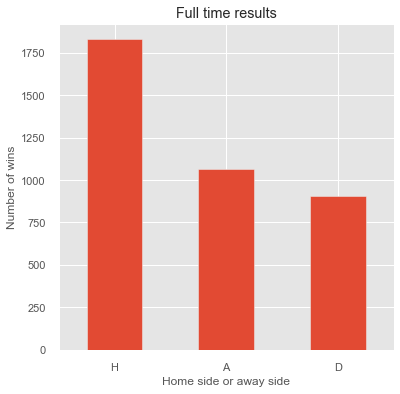

In [793]:
plt.style.use('ggplot')
'''
#  plottting full time results to check if home side or away side has won more games
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1,
              color_codes=True,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [6, 6]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'''
df['FTR'].value_counts().plot(kind = 'bar')
plt.title("Full time results")
plt.xlabel("Home side or away side")
plt.ylabel("Number of wins")
plt.xticks(rotation = 0)
plt.show()

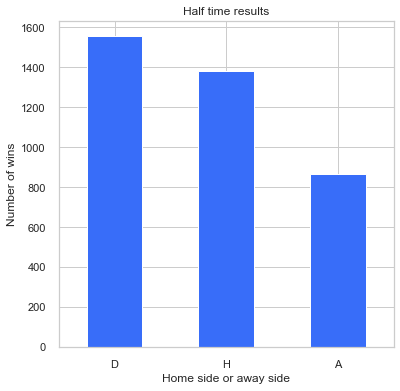

In [583]:
# plottting half time results to check if home side or away side has won more games
df['HTR'].value_counts().plot(kind = 'bar')
plt.title("Half time results")
plt.xlabel("Home side or away side")
plt.ylabel("Number of wins")
plt.xticks(rotation = 0)
plt.show()

In [584]:
df.HTR.value_counts()

D    1555
H    1382
A     863
Name: HTR, dtype: int64

Based on the above obtained results, it clearly states that Home side has more advantage than the away side.

In [585]:
total_teams_df.describe()

,Unnamed: 0,F_Goals,H_Goals,Shots,Shots_on_Target,Corners,Fouls,Red_Cards,Yellow_cards
count,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,1899.500000,1.373158,0.603947,12.444211,4.466447,5.212895,14.246711,0.144474,2.585526
std,1097.037649,1.294492,0.802014,5.043440,2.555489,2.869618,4.392004,0.382773,1.504321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,949.750000,0.000000,0.000000,9.000000,3.000000,3.000000,11.000000,0.000000,2.000000
50%,1899.500000,1.000000,0.000000,12.000000,4.000000,5.000000,14.000000,0.000000,2.000000
75%,2849.250000,2.000000,1.000000,15.000000,6.000000,7.000000,17.000000,0.000000,4.000000
max,3799.000000,10.000000,6.000000,39.000000,18.000000,20.000000,33.000000,3.000000,9.000000


<AxesSubplot:>

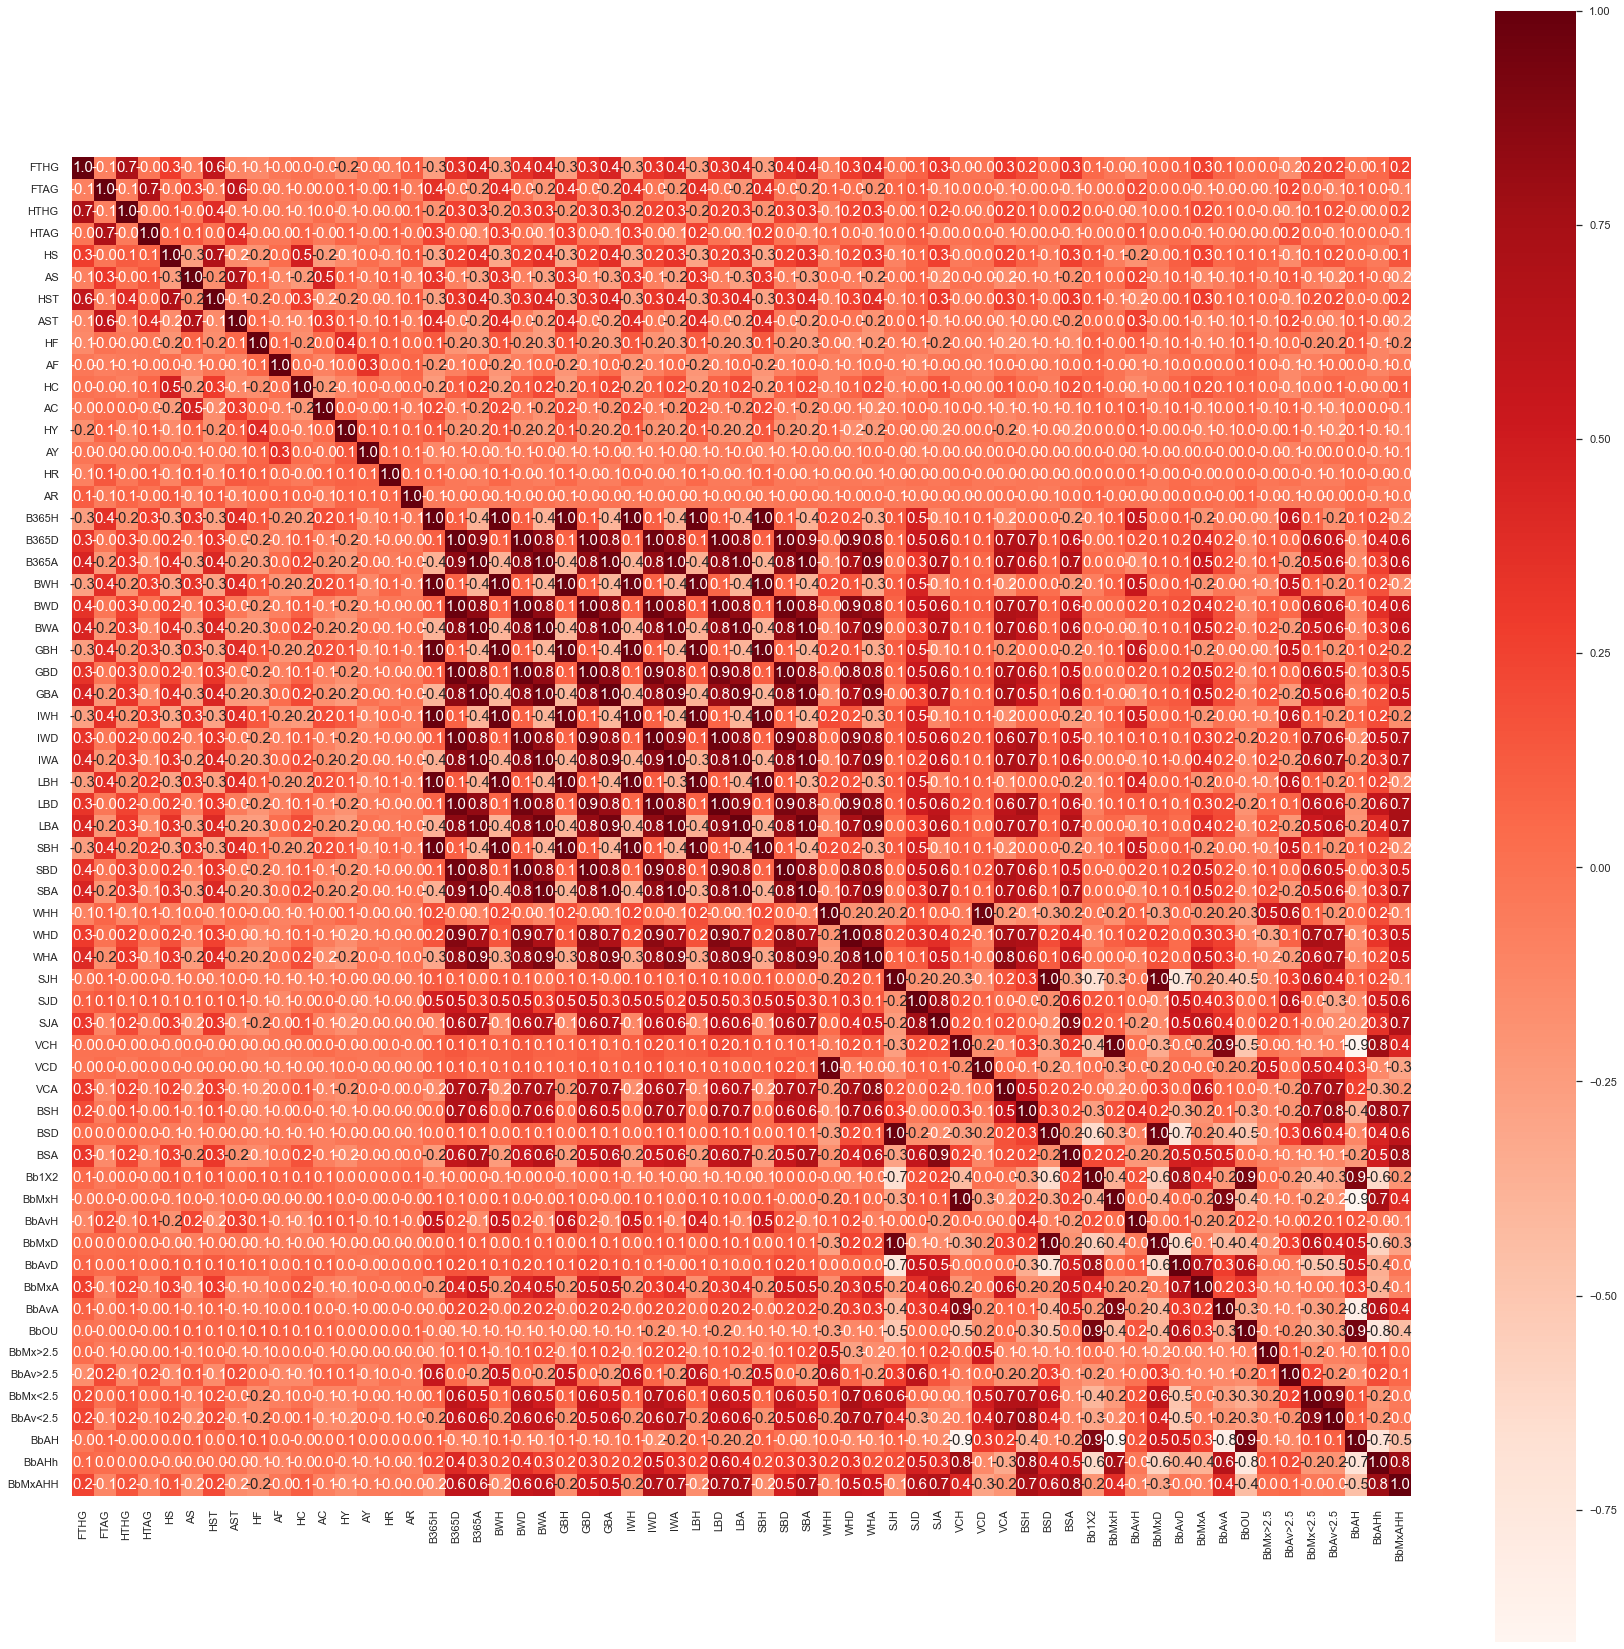

In [586]:
# plotting correlation matrix for df
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [587]:
total_teams_df.head()

,Unnamed: 0,Date,Team,F_Goals,H_Goals,Shots,Shots_on_Target,Corners,Fouls,Red_Cards,Yellow_cards,FTR,HTR
0,0,29/08/2009,Real Madrid,3,2,28,11,10,18,0,2,H,H
1,1,29/08/2009,Zaragoza,1,0,17,8,7,16,0,1,H,D
2,2,30/08/2009,Almeria,0,0,20,5,12,9,0,2,D,D
3,3,30/08/2009,Ath Bilbao,1,0,14,4,6,11,0,2,H,D
4,4,30/08/2009,Malaga,3,1,8,4,4,16,0,4,H,H


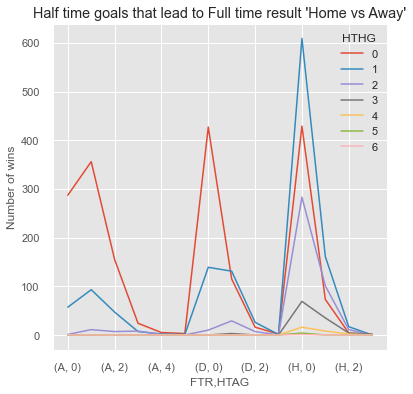

In [795]:
#plt.style.use('ggplot')
grouped_df = df.groupby(['FTR','HTAG','HTHG']).size().unstack(fill_value=0)
grouped_df.plot(kind = 'line')
plt.title("Half time goals that lead to Full time result 'Home vs Away'")
plt.ylabel("Number of wins")
plt.show()

#grouped_df.to_csv("Half time goals that lead to Full time result.csv")

In [589]:
grouped_df.to_csv('grouped.csv')

<AxesSubplot:>

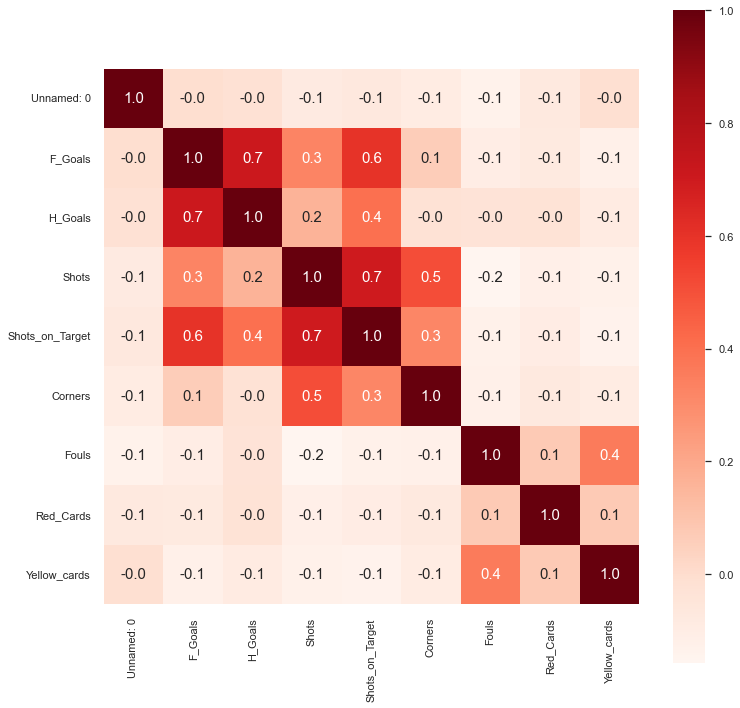

In [590]:
# plotting correlation matrix for tota_team_df
corr = total_teams_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')


In [591]:
value_check = df.FTR.value_counts()
for i,k in value_check.iteritems():
    p = k/3800 * 100
    print('Class=%s, n=%d (%.3f%%)' % (i, k, p))

Class=H, n=1829 (48.132%)
Class=A, n=1065 (28.026%)
Class=D, n=906 (23.842%)


In [592]:
value_check = df.HTR.value_counts()
for i,k in value_check.iteritems():
    p = k/3800 * 100
    print('Class=%s, n=%d (%.3f%%)' % (i, k, p))

Class=D, n=1555 (40.921%)
Class=H, n=1382 (36.368%)
Class=A, n=863 (22.711%)


In [593]:
df.loc[df['FTR']=='H','Target'] = '0'
df.loc[df['FTR']=='A','Target'] = '1'
df.loc[df['FTR']=='D','Target'] = '2'

# converting half time results to numberical
df.loc[df['HTR']=='H','HTR'] = '0'
df.loc[df['HTR']=='A','HTR'] = '1'
df.loc[df['HTR']=='D','HTR'] = '2'

In [594]:

to_change_target = df.pop('Target')
df.insert(23, 'Target', to_change_target)

df.head()

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH
0,SP1,Season-09/10,29/08/2009,Real Madrid,La Coruna,3,2,H,2,1,...,15.00,11.75,28.0,1.52,1.48,2.90,2.53,19.0,0.0,9.00
1,SP1,Season-09/10,29/08/2009,Zaragoza,Tenerife,1,0,H,0,0,...,4.52,4.10,28.0,2.08,1.97,1.91,1.79,18.0,0.0,1.38
2,SP1,Season-09/10,30/08/2009,Almeria,Valladolid,0,0,D,0,0,...,3.69,3.36,28.0,2.16,2.02,1.83,1.74,19.0,0.0,1.62
3,SP1,Season-09/10,30/08/2009,Ath Bilbao,Espanol,1,0,H,0,0,...,3.50,3.22,29.0,2.15,2.02,1.81,1.74,19.0,0.0,1.66
4,SP1,Season-09/10,30/08/2009,Malaga,Ath Madrid,3,0,H,1,0,...,2.30,2.10,28.0,1.85,1.80,2.13,1.96,18.0,0.0,2.60


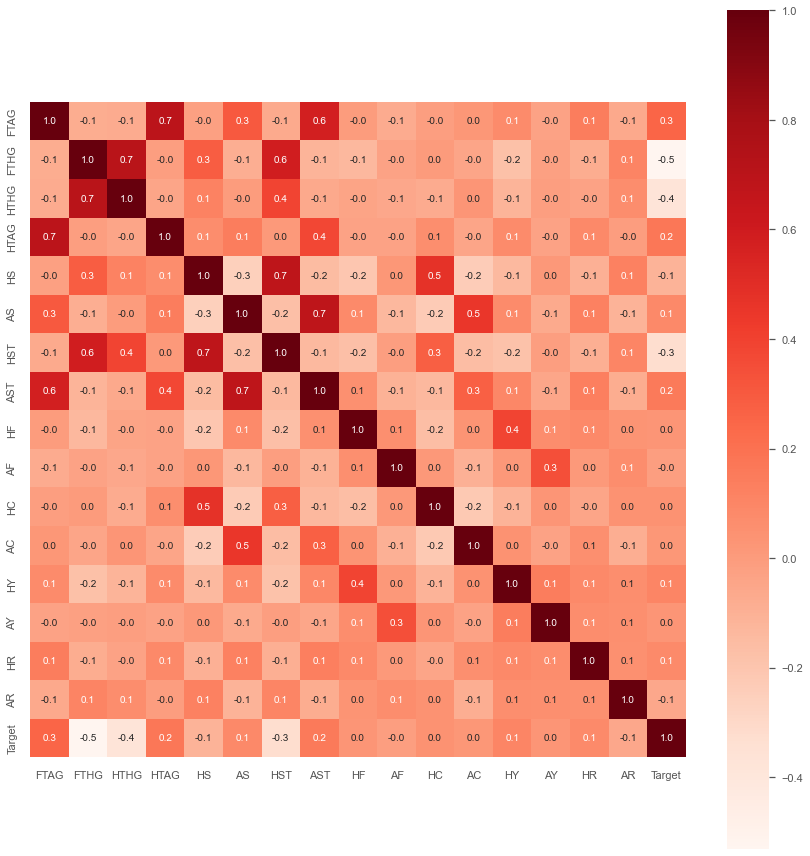

In [845]:
df_for_corr = df[['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTR','Target']]

df_for_corr['Target'] = df_for_corr['Target'].astype(int)
corr = df_for_corr.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')
plt.tight_layout()



<AxesSubplot:xlabel='FTR', ylabel='HF'>

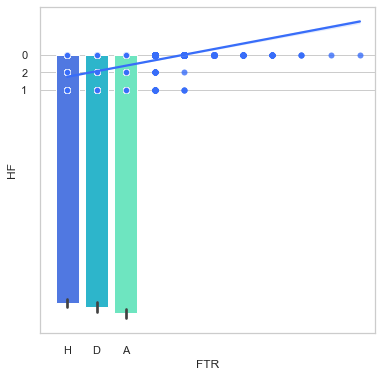

In [372]:
sns.regplot(df_for_corr['FTHG'],df_for_corr['Target'])
sns.barplot(x=df['FTR'],y=df['HF'])
sns.scatterplot(x=df['FTR'], y=df['HTR'])

<AxesSubplot:xlabel='FTR', ylabel='AY'>

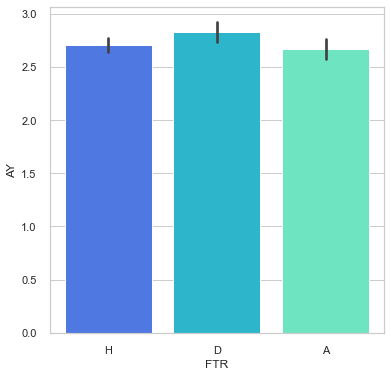

In [373]:
sns.barplot(x=df['FTR'], y=df['AY'])
sns.lineplot(df['HST'])

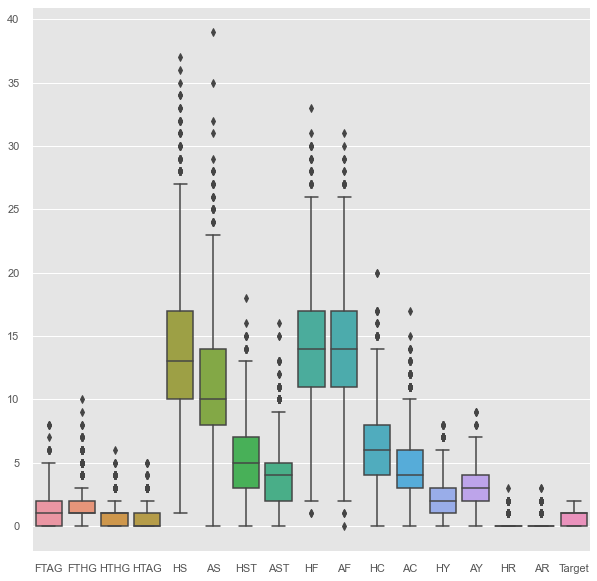

In [374]:
# to check outliers
plt.style.use("ggplot")
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=df_for_corr)

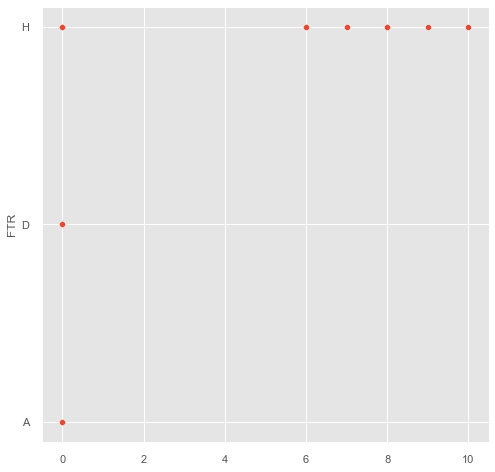

In [159]:
sns.scatterplot(x=np.where(df['FTHG']>5,df['FTHG'],0), y=df['FTR'], data=df)

a = np.where(df['AS']>25,df['AS'],0)


In [ ]:
# to check the distribution of each column
for i in df_for_corr.columns:
    df_for_corr[i].plot(kind = 'hist')
    plt.show()

# imputing outliers with mean value
mean_value = df_for_corr['HS'].mean()
df_for_corr['HS'] = np.where(df_for_corr['HS']>27, mean_value, df_for_corr['HS'])

mean_value = df_for_corr['AS'].mean()
df_for_corr['AS'] = np.where(df_for_corr['AS']>23, mean_value, df_for_corr['AS'])

mean_value = df_for_corr['HF'].mean()
df_for_corr['HF'] = np.where(df_for_corr['HF']>26, mean_value, df_for_corr['HF'])
df_for_corr['HF'] = np.where(df_for_corr['HF']<3, mean_value, df_for_corr['HF'])

mean_value = df_for_corr['AF'].mean()
df_for_corr['AF'] = np.where(df_for_corr['AF']>26, mean_value, df_for_corr['AF'])
df_for_corr['AF'] = np.where(df_for_corr['AF']<3, mean_value, df_for_corr['AF'])

#mean_value = df_for_corr['FTAG'].mean()
#df_for_corr['FTAG'] = np.where(df_for_corr['FTAG']>5, mean_value, df_for_corr['FTAG'])

#mean_value = df_for_corr['FTHG'].mean()
#df_for_corr['FTHG'] = np.where(df_for_corr['FTHG']>3, mean_value, df_for_corr['FTHG'])

#mean_value = df_for_corr['HTHG'].mean()
#df_for_corr['HTHG'] = np.where(df_for_corr['HTHG']>2, mean_value, df_for_corr['HTHG'])

#mean_value = df_for_corr['HTAG'].mean()
#df_for_corr['HTAG'] = np.where(df_for_corr['HTAG']>2, mean_value, df_for_corr['HTAG'])

#mean_value = df_for_corr['HST'].mean()
#df_for_corr['HST'] = np.where(df_for_corr['HST']>13, mean_value, df_for_corr['HST'])

#mean_value = df_for_corr['AST'].mean()
#df_for_corr['AST'] = np.where(df_for_corr['AST']>9, mean_value, df_for_corr['AST'])

mean_value = df_for_corr['HC'].mean()
df_for_corr['HC'] = np.where(df_for_corr['HC']>14, mean_value, df_for_corr['HC'])

mean_value = df_for_corr['HC'].mean()
df_for_corr['AC'] = np.where(df_for_corr['AC']>10, mean_value, df_for_corr['AC'])

mean_value = df_for_corr['HY'].mean()
df_for_corr['HY'] = np.where(df_for_corr['HY']>6, mean_value, df_for_corr['HY'])

mean_value = df_for_corr['AY'].mean()
df_for_corr['AY'] = np.where(df_for_corr['AY']>7, mean_value, df_for_corr['AY'])

mean_value = df_for_corr['HR'].mean()
df_for_corr['HR'] = np.where(df_for_corr['HR']>2, mean_value, df_for_corr['HR'])

mean_value = df_for_corr['AR'].mean()
df_for_corr['AR'] = np.where(df_for_corr['AR']>2, mean_value, df_for_corr['AR'])

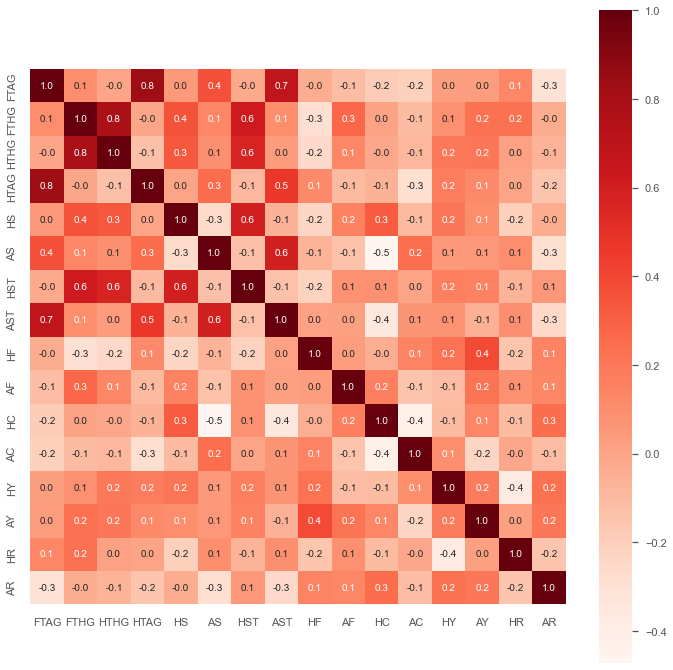

<AxesSubplot:xlabel='FTR', ylabel='HF'>

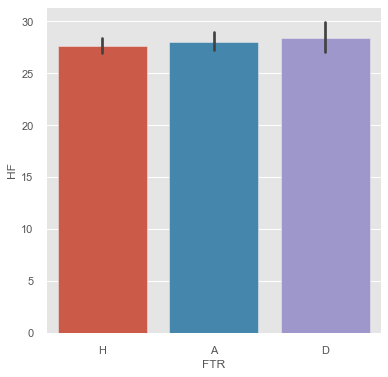

In [375]:
df_HF_above_25 = df[df['HF']>25]
corr = df_HF_above_25[['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTR','Target']].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')
plt.show()

sns.barplot(x=df_HF_above_25['FTR'],y=df_HF_above_25['HF'])



In [ ]:
# to check outliers
plt.style.use("ggplot")
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=df_for_corr)

In [ ]:
df_for_corr.describe()

<AxesSubplot:xlabel='HR', ylabel='AR'>

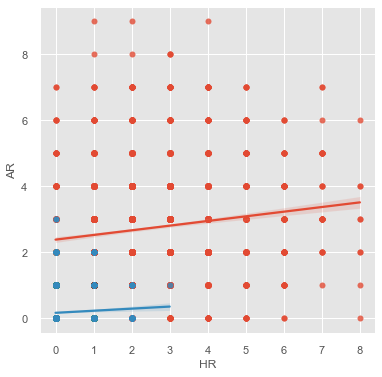

In [391]:
sns.regplot(df_for_corr['HY'],df_for_corr['AY'])
sns.regplot(df_for_corr['HR'],df_for_corr['AR'])
plt.xlabel("")


<AxesSubplot:xlabel='HY', ylabel='AY'>

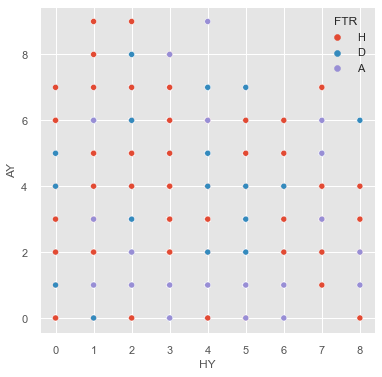

In [393]:
sns.scatterplot(data = df, x = 'HY',y='AY', hue = 'FTR')

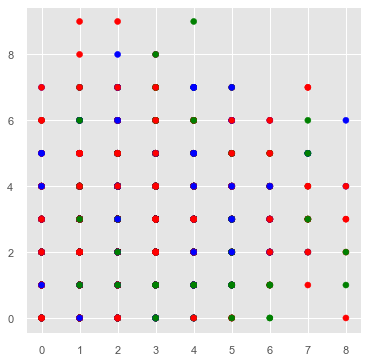

In [440]:
#sns.scatterplot(data = df, x = 'HY',y='AY', hue = 'HTR')


fig, ax = plt.subplots()

colours = {'H': 'red','D':'blue','A': 'green'}
group = ['H','D','A']
ax.scatter(df['HY'],df['AY'],c=df['FTR'].map(colours),label = [i for i in group])
plt.show()

<AxesSubplot:xlabel='HY', ylabel='AY'>

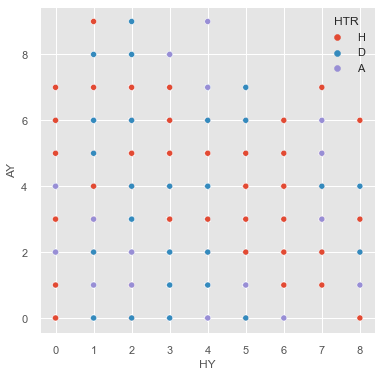

In [441]:
sns.scatterplot(data = df, x = 'HY',y='AY', hue = 'HTR')

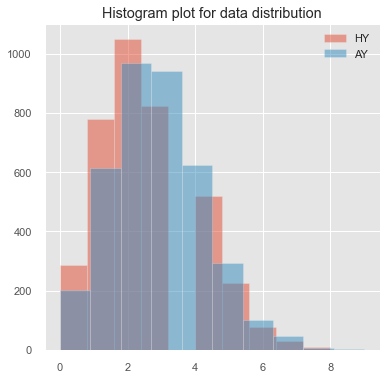

In [442]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 1)

plt.hist(df['HY'], alpha=0.5, label='HY')
plt.hist(df['AY'], alpha=0.5, label='AY')
plt.title("Histogram plot for data distribution")
plt.legend(loc='upper right')

#axis[0, 1].sns.scatterplot(data = df, x = 'HY',y='AY', hue = 'HTR')
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

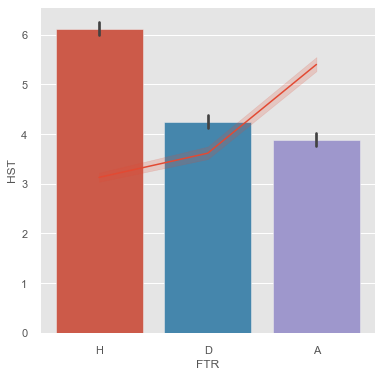

In [683]:
ax = sns.barplot(data=df,x='FTR',y='HST')
sns.lineplot(data=df,x='FTR',y='AST')
plt.tight_layout

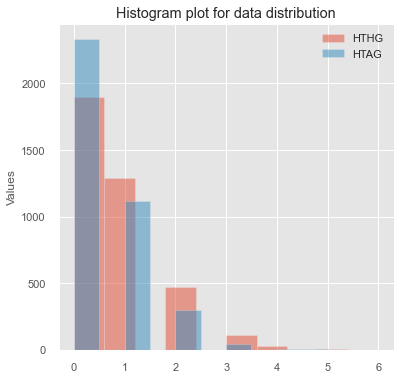

In [446]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 1)

plt.hist(df['HTHG'], alpha=0.5, label='HTHG')
plt.hist(df['HTAG'], alpha=0.5, label='HTAG')
plt.title("Histogram plot for data distribution")
plt.ylabel("Values")
plt.legend(loc='upper right')

#axis[0, 1].sns.scatterplot(data = df, x = 'HY',y='AY', hue = 'HTR')
plt.show()

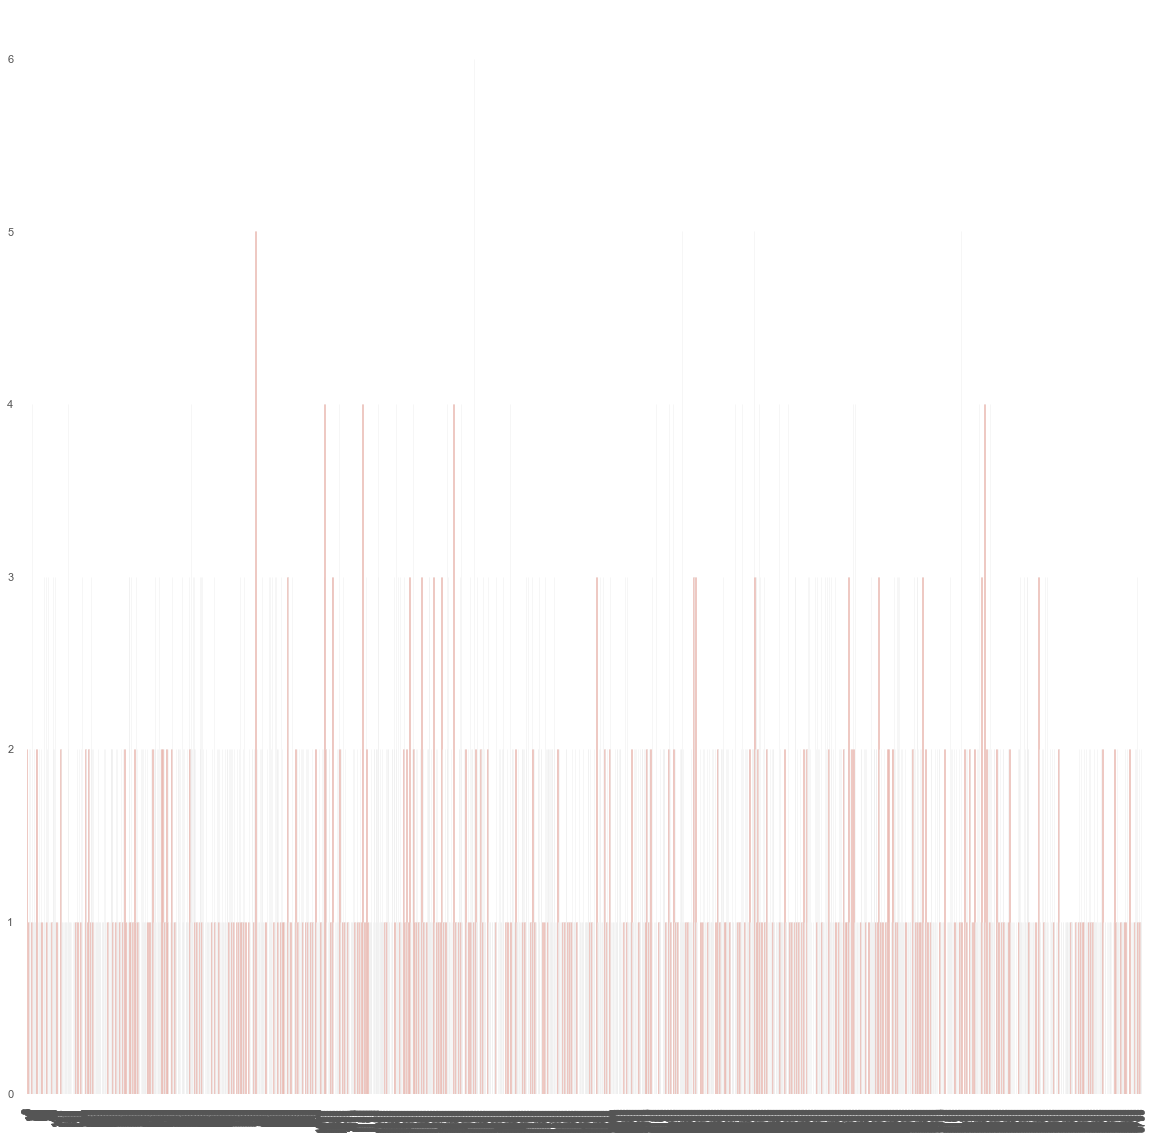

In [605]:
plt.figure(figsize= (20,20))
df['HTHG'].plot(kind = 'bar')
plt.show()

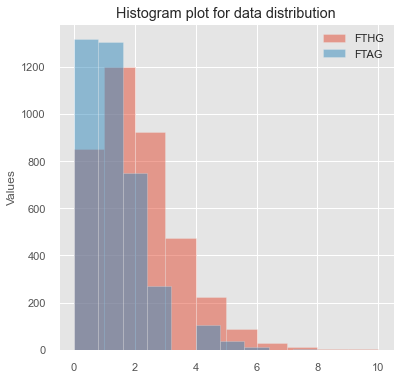

In [445]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 1)

plt.hist(df['FTHG'], alpha=0.5, label='FTHG')
plt.hist(df['FTAG'], alpha=0.5, label='FTAG')
plt.title("Histogram plot for data distribution")
plt.ylabel("Values")
plt.legend(loc='upper right')

#axis[0, 1].sns.scatterplot(data = df, x = 'HY',y='AY', hue = 'HTR')
plt.show()

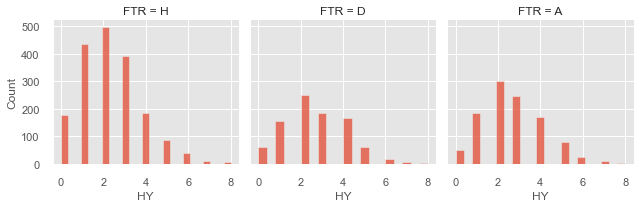

In [411]:
g = sns.FacetGrid(df, col='FTR')
g.map(sns.histplot, 'HY')

1.Copy the season column from df to total_teams_df
2.Do clustering
3.Build the classifier

In [329]:
# splitting the dataset for training the model and prediction

X = df_for_corr.iloc[:,:-1].values
y = df_for_corr.iloc[:,16].values

df_for_corr.head()

,FTAG,FTHG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTR,Target,cluster_label
0,2,3,2,1,13.962368,9.0,11,3,18.0,12.0,10.0,3.0,2.0,2.0,0.0,0.0,0,Home Win,2
1,0,1,0,0,17.000000,16.0,8,2,16.0,17.0,7.0,8.0,1.0,4.0,0.0,0.0,2,Home Win,0
2,0,0,0,0,20.000000,7.0,5,1,9.0,11.0,12.0,2.0,2.0,2.0,0.0,1.0,2,Draw,0
3,0,1,0,0,14.000000,8.0,4,1,11.0,18.0,6.0,3.0,2.0,6.0,0.0,0.0,2,Home Win,0
4,0,3,1,0,8.000000,16.0,4,3,16.0,8.0,4.0,5.0,4.0,4.0,0.0,0.0,0,Home Win,2


In [326]:
# recursive feature elimination 

rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select=8, verbose=10)
rfe.fit(X,y)

for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i,rfe.support_[i],rfe.ranking_[i]))

ValueError: could not convert string to float: 'Home Win'

Class=0, n=1382 (36.368%)
Class=2, n=1555 (40.921%)
Class=1, n=863 (22.711%)


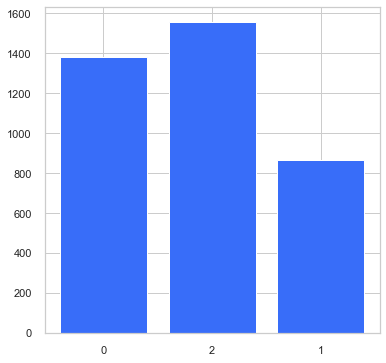

In [330]:
# summarize distribution
from cProfile import label
from turtle import color


counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [615]:
df_for_corr_check = df_for_corr
scalar = StandardScaler()
standardised_df = scalar.fit_transform(df_for_corr_check)
standardised_df = pd.DataFrame(standardised_df,columns = df_for_corr_check.columns)
standardised_df.head()

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTR,Target
0,1.497354,0.695243,2.773609,-0.423937,2.228770,-0.384932,0.825810,-0.498238,1.360727,-0.572278,-0.300910,-0.479517,-0.350913,-0.403236,-1.190852,-0.931411
1,-0.824125,-0.689413,0.600187,1.116810,1.104871,-0.821311,0.375584,0.654108,0.349693,1.382998,-0.973929,0.845212,-0.350913,-0.403236,1.087144,-0.931411
2,-0.824125,-0.689413,1.192938,-0.864151,-0.019027,-1.257690,-1.200209,-0.728707,2.034749,-0.963334,-0.300910,-0.479517,-0.350913,2.048440,1.087144,1.529042
3,-0.824125,-0.689413,0.007435,-0.644044,-0.393660,-1.257690,-0.749983,0.884577,0.012682,-0.572278,-0.300910,2.169942,-0.350913,-0.403236,1.087144,-0.931411
4,0.336615,-0.689413,-1.178068,1.116810,-0.393660,-0.384932,0.375584,-1.420115,-0.661340,0.209832,1.045127,0.845212,-0.350913,-0.403236,-1.190852,-0.931411


In [616]:
# splitting data into train, validation and test sets

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(standardised_df, target = 'Target', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

print(X_train.shape),print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

# label encoding to avoid continuous values
y_train = LabelEncoder().fit_transform(y_train)
y_valid = LabelEncoder().fit_transform(y_valid)
y_test = LabelEncoder().fit_transform(y_test)


(2660, 15)
(2660,)
(760, 15)
(760,)
(380, 15)
(380,)


In [617]:
# Evaluation model

def evaluate(y_predict, y_test):
    """
    Evaluate the classifier performance by accuracy, percision, recall and f1
    
    Input: y_predict and the ground truth y_test
    Output: accuracy, precision, recall, f1
    """
    accuracy = metrics.accuracy_score(y_test, y_predict)
    precision = metrics.precision_score(y_test, y_predict, average="macro")
    recall = metrics.recall_score(y_test, y_predict, average="macro")
    f1 = metrics.f1_score(y_test, y_predict, average="macro")
    print("accuracy = ", accuracy)
    print("precision = ", precision)
    print("recall = ", recall)
    print("f1 = ", f1)
    
    return accuracy, precision, recall, f1

In [618]:
# confusion matrix and classification report

def matrix(y_test, y_pred, string):
    # evaluating the performance by comparing the output with y_test
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
    #Plotting the confusion matrix
    cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
    #Plotting the confusion matrix

    ax = sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues')
    ax.set_title(string)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')

    print(classification_report(y_test, y_pred))

    return cm, ax

In [378]:
from sklearn.metrics import roc_curve, roc_auc_score
# roc curve plot
def roc(y_test, y_pred):
    false_positive, true_positive, threshold = roc_curve(y_test,y_pred, pos_label='your label')

    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive, true_positive)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print("roc auc score:",roc_auc_score(y_test, y_pred))

    return false_positive, true_positive, threshold


In [ ]:
# fitting the dataset into the model and assigning neighours or K value = 5, as it is the standard value to give initially

knn_classifer = KNeighborsClassifier(n_neighbors=5)

# training the model with training dataset and labels
history = knn_classifer.fit(X_train,y_train)

# predicting the output using x_test
y_pred = knn_classifer.predict(X_valid)

# evaluating the performance by comparing the output with y_test

matrix(y_valid, y_pred)
evaluate(y_valid, y_pred)


# changing the neighbours or k value to obtain better accuracy


neighbors = np.arange(1,25)
validating_accuracy = np.empty(len(neighbors))
training_accuracy = np.empty(len(neighbors))
testing_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_classifer = KNeighborsClassifier(n_neighbors=k)
    knn_classifer.fit(X_train, y_train)
    y_pred = knn_classifer.predict(X_valid)

    # storing testing acccuracy
    validating_accuracy[i] = accuracy_score(y_valid,y_pred)
    # storing training accuracy
    training_accuracy[i] = knn_classifer.score(X_train,y_train)

# plotting accuracy values
plt.figure(figsize=(12,5))
plt.title("Accuracy evaluation for KNN")
plt.plot(neighbors, validating_accuracy, label = "Validating Accuracy")
plt.plot(neighbors, training_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("n_neighours(k) values")    
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
# validating the KNN result obtained using testing set

# predicting the output using x_test
y_pred = knn_classifer.predict(X_test)

# evaluating the performance by comparing the output with y_test
matrix(y_test, y_pred)
evaluate(y_test, y_pred)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    knn_classifer, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

importance_KNN = pd.DataFrame([forest_importances], columns = X_test.columns).T.reset_index()
plt.figure(figsize = (8,8))
sns.barplot(x = 0, y = 'index', data = importance_KNN).set_title("Variable Importance Logistic ");

In [ ]:
training_accuracy

In [902]:
# splitting data into train, validation and test sets

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_for_corr, target = 'Target', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

print(X_train.shape),print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

# label encoding to avoid continuous values
y_train = LabelEncoder().fit_transform(y_train)
y_valid = LabelEncoder().fit_transform(y_valid)
y_test = LabelEncoder().fit_transform(y_test)


(2660, 17)
(2660,)
(760, 17)
(760,)
(380, 17)
(380,)


In [ ]:
# exploring the no. of features to reduced over fitting in random forest


def get_models():
    models = dict()
    for i in range(1,8):
        models[str(i)] = RandomForestClassifier(max_features = i)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=6,n_repeats = 5, random_state=1)
    score = cross_val_score(model,X,y,cv=cv,n_jobs=-1,scoring = 'accuracy')
    return score


results, names = list(),list()
models = get_models()
for name, model in models.items():

    scores = evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)

    print('>%s %.3f (%.3f)' % (name, mean(scores), stdev(scores)))

plt.boxplot(results,labels=names, showmeans=True)
plt.show()

In [ ]:
# building random forest classifer

forest_classifer = RandomForestClassifier(n_estimators=100, bootstrap=True, min_samples_leaf=1, class_weight='balanced', verbose=2, random_state=1, max_features = 1)

forest_classifer.fit(X_train, y_train)
y_pred = forest_classifer.predict(X_valid)

print("Accuracy on test data", accuracy_score(y_valid,y_pred))
print("Accuracy on train data", forest_classifer.score(X_train, y_train))

cm = confusion_matrix(y_valid, y_pred)

cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
#Plotting the confusion matrix

ax = sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Display the visualization of the Confusion Matrix.
plt.show()

print(forest_classifer.feature_importances_)


# Classification table 
print(classification_report(y_valid, y_pred))

In [ ]:
# validating random forest result obtained using testing set

# predicting the output using x_test
y_pred = forest_classifer.predict(X_test)

# evaluating the performance by comparing the output with y_test
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
#Plotting the confusion matrix
cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
#Plotting the confusion matrix

ax = sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

print(classification_report(y_test, y_pred))

In [ ]:
# calculating the important variables for the predictors

result = permutation_importance(
    forest_classifer, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

importance_forest = pd.DataFrame([result.importances_mean], columns = X_test.columns).T.reset_index()
plt.figure(figsize = (8,8))
sns.barplot(x = 0, y = 'index', data = importance_forest).set_title("Variable Importance Logistic ");

forest_importances.head()

In [ ]:
# decision tree classifier

tree_classifer = DecisionTreeClassifier(criterion='gini',random_state=42)
tree_classifer.fit(X_train,y_train)
y_pred = tree_classifer.predict(X_valid)

# To check the accuracy
print("Valid accuracy:",accuracy_score(y_valid,y_pred))
print("Train accuracy:",tree_classifer.score(X_train,y_train))

# Confusion matrix
print(classification_report(y_valid,y_pred))

In [ ]:
# validating with test data

y_pred = tree_classifer.predict(X_test)
# To check the accuracy
print("Test accuracy:",accuracy_score(y_test,y_pred))

# Confusion matrix
print(classification_report(y_test,y_pred))

In [ ]:
df['FTR'].value_counts()

In [ ]:
X.shape, y.shape

In [ ]:
#standardise the x_train and x_test to scale the features under same values

scalar = StandardScaler()
standardised_df = scalar.fit_transform(df_for_corr)
standardised_df = pd.DataFrame(standardised_df,columns = df_for_corr.columns)
standardised_df.head()

# splitting data into train, validation and test sets

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(standardised_df, target = 'Target', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

print(X_train.shape),print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

# label encoding to avoid continuous values
y_train = LabelEncoder().fit_transform(y_train)
y_valid = LabelEncoder().fit_transform(y_valid)
y_test = LabelEncoder().fit_transform(y_test)

In [ ]:
# Support vector machine

svm_clf = SVC(kernel='linear', random_state=1, verbose=2)
svm_clf.fit(X_train,y_train)

# to predict
y_pred = svm_clf.predict(X_valid)

print("Test data accuracy:", accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))
print("Train data accuracy:", svm_clf.score(X_train,y_train))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)

cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
#Plotting the confusion matrix

ax = sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')


In [ ]:
# validating the SVM result obtained using testing set

# predicting the output using x_test
y_pred = svm_clf.predict(X_test)

# evaluating the performance by comparing the output with y_test
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
#Plotting the confusion matrix
cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
#Plotting the confusion matrix

ax = sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svm_clf, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

In [ ]:
# calculating the important variables for the predictors

result = permutation_importance(
    svm_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

importance_svm = pd.DataFrame([result.importances_mean], columns = X_test.columns).T.reset_index()
plt.figure(figsize = (8,8))
sns.barplot(x = 0, y = 'index', data = importance_svm).set_title("Variable Importance Logistic ");

*Reduce the accuracy by changing the features

In [ ]:
acc_score = [78, 90, 97]
labels = ['k-NN', 'Random Forest', 'SVM']

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
sns_acc = sns.barplot(labels, y=acc_score)
sns_acc.set_title("Accuracy Plot")
sns_acc.set_xlabel("Model")
sns_acc.set_ylabel("Accuracy score")
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encoding for clustering

dummy = pd.get_dummies(df,columns=['FTR'],prefix=['Wins'])

#dummy['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTR','Wins_A','Wins_D','Wins_H']
for_cluster = pd.DataFrame(dummy,columns=['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTR','Wins_A','Wins_D','Wins_H'])
for_cluster.head()

,FTAG,FTHG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTR,Target
0,2,3,2,1,28,9,11,3,18,12,10,3,2,2,0,0,0,0
1,0,1,0,0,17,16,8,2,16,17,7,8,1,4,0,0,2,0
2,0,0,0,0,20,7,5,1,9,11,12,2,2,2,0,1,2,2
3,0,1,0,0,14,8,4,1,11,18,6,3,2,6,0,0,2,0
4,0,3,1,0,8,16,4,3,16,8,4,5,4,4,0,0,0,0


In [846]:
cluster_df = df_for_corr[['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
for_cluster = df_for_corr[['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

In [847]:
# k means clustering
#just_for_cluster_frame = df_for_corr[['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTR']]
#cluster_df.drop(columns=['kmeans'],inplace = True)

# apply standard scalar

scalar = StandardScaler()
cluster_df = scalar.fit_transform(cluster_df)
cluster_df = pd.DataFrame(cluster_df,columns=['FTAG','FTHG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'])

cluster_df.head()



,FTAG,FTHG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0.736941,1.015945,1.497354,0.695243,2.773609,-0.423937,2.228770,-0.384932,0.825810,-0.498238,1.360727,-0.572278,-0.300910,-0.479517,-0.350913,-0.403236
1,-0.978976,-0.440882,-0.824125,-0.689413,0.600187,1.116810,1.104871,-0.821311,0.375584,0.654108,0.349693,1.382998,-0.973929,0.845212,-0.350913,-0.403236
2,-0.978976,-1.169295,-0.824125,-0.689413,1.192938,-0.864151,-0.019027,-1.257690,-1.200209,-0.728707,2.034749,-0.963334,-0.300910,-0.479517,-0.350913,2.048440
3,-0.978976,-0.440882,-0.824125,-0.689413,0.007435,-0.644044,-0.393660,-1.257690,-0.749983,0.884577,0.012682,-0.572278,-0.300910,2.169942,-0.350913,-0.403236
4,-0.978976,1.015945,0.336615,-0.689413,-1.178068,1.116810,-0.393660,-0.384932,0.375584,-1.420115,-0.661340,0.209832,1.045127,0.845212,-0.350913,-0.403236


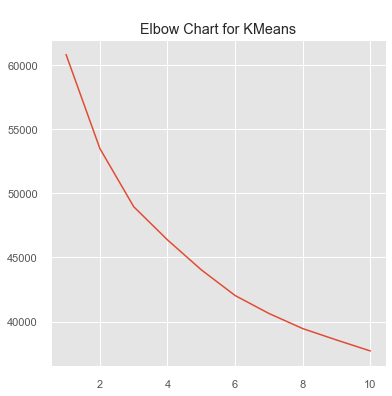

In [848]:
# elbow plot to determine the number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cluster_df)
    sse.append(kmeans.inertia_)

plt.style.use('ggplot')
sns.lineplot(x=list(range(1, 11)), y = sse)
plt.title("\nElbow Chart for KMeans");

In [880]:
# shrinking the variables into two columns using decomposed PCA model

decomposed_data = pd.DataFrame(PCA(n_components=2).fit_transform(cluster_df), columns = ['FirstComp', 'SecondComp'])
kmean = KMeans(n_clusters=3,**kmeans_kwargs)
kmean.fit(cluster_df)
decomposed_data['cluster_label'] = kmean.predict(cluster_df)   ## Here I am actually using the original data to do clustering
cluster_df['cluster_label'] = decomposed_data['cluster_label']

decomposed_data.head()

,FirstComp,SecondComp,cluster_label
0,-2.828157,2.655643,1
1,-0.621923,-0.600655,0
2,-2.273694,-1.142173,1
3,-1.120797,-2.135153,0
4,0.689248,-0.662426,0


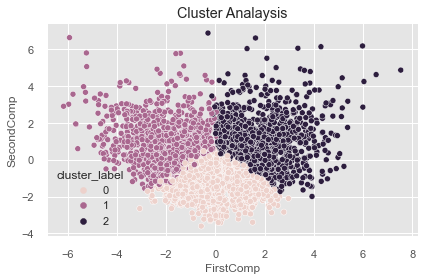

In [881]:
# cluster plotting

plt.style.use('ggplot')
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'FirstComp', y = 'SecondComp', data = decomposed_data, hue = 'cluster_label')
plt.title("Cluster Analaysis")
plt.tight_layout()

In [882]:
for_cluster['cluster_label'] = cluster_df['cluster_label']

# taking average for each clusters
frame_avg = for_cluster.groupby('cluster_label').mean().reset_index()
frame_avg_cols = frame_avg.columns


frame_avg.head()

,cluster_label,FTAG,FTHG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0.633725,1.021618,0.392835,0.220506,12.449043,9.297097,3.840025,2.820877,15.153799,15.158740,5.675726,4.075973,2.683755,3.032119,0.082767,0.147004
1,1,0.853408,2.887021,1.338002,0.422035,18.273576,9.154062,7.909430,3.008403,12.516340,13.953315,7.270775,3.727358,1.757236,2.561158,0.045752,0.267040
2,2,2.158559,1.219820,0.566667,0.975676,12.009910,15.011712,4.058559,6.272973,14.883784,12.909009,5.118018,5.738739,2.767568,2.431532,0.261261,0.090991


In [898]:
# finding the difference between clusters in each column

diff_frame = []
for col in frame_avg_cols[1:]:
    diff_frame.append([col, frame_avg[col].iloc[0] - frame_avg[col].iloc[1],frame_avg[col].iloc[1] - frame_avg[col].iloc[2], frame_avg[col].iloc[2] - frame_avg[col].iloc[0]])
diff_frame = pd.DataFrame(diff_frame, columns=['Feature', 'Difference1','Difference2','Difference3']) 
diff_frame

,Feature,Difference1,Difference2,Difference3
0,FTAG,-0.219684,-1.305151,1.524834
1,FTHG,-1.865403,1.667202,0.198202
2,HTHG,-0.945167,0.771335,0.173832
3,HTAG,-0.201529,-0.553640,0.755169
4,HS,-5.824533,6.263666,-0.439133
5,AS,0.143035,-5.857650,5.714615
6,HST,-4.069406,3.850872,0.218534
7,AST,-0.187526,-3.264570,3.452096
8,HF,2.637459,-2.367444,-0.270015
9,AF,1.205425,1.044306,-2.249731


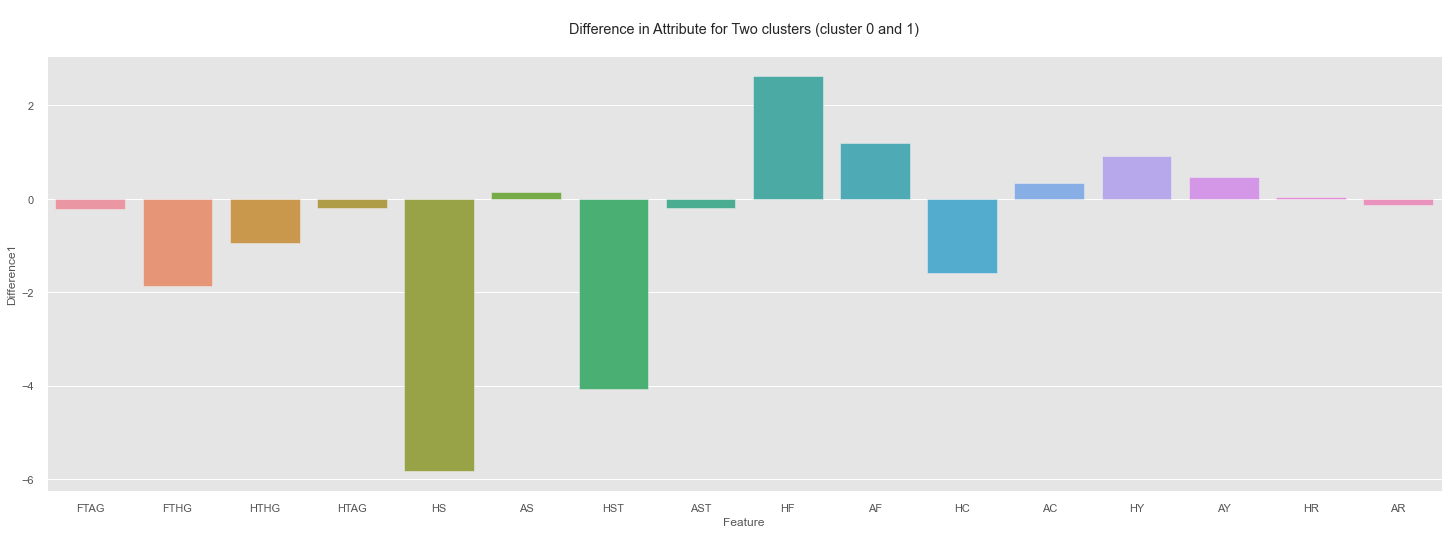

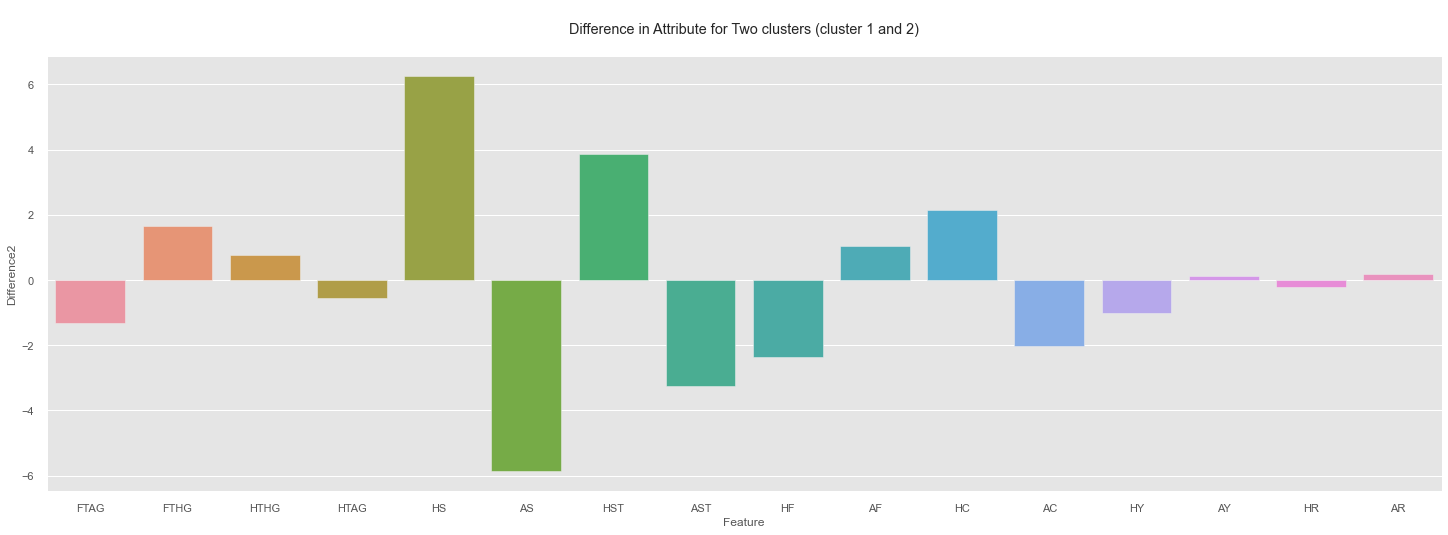

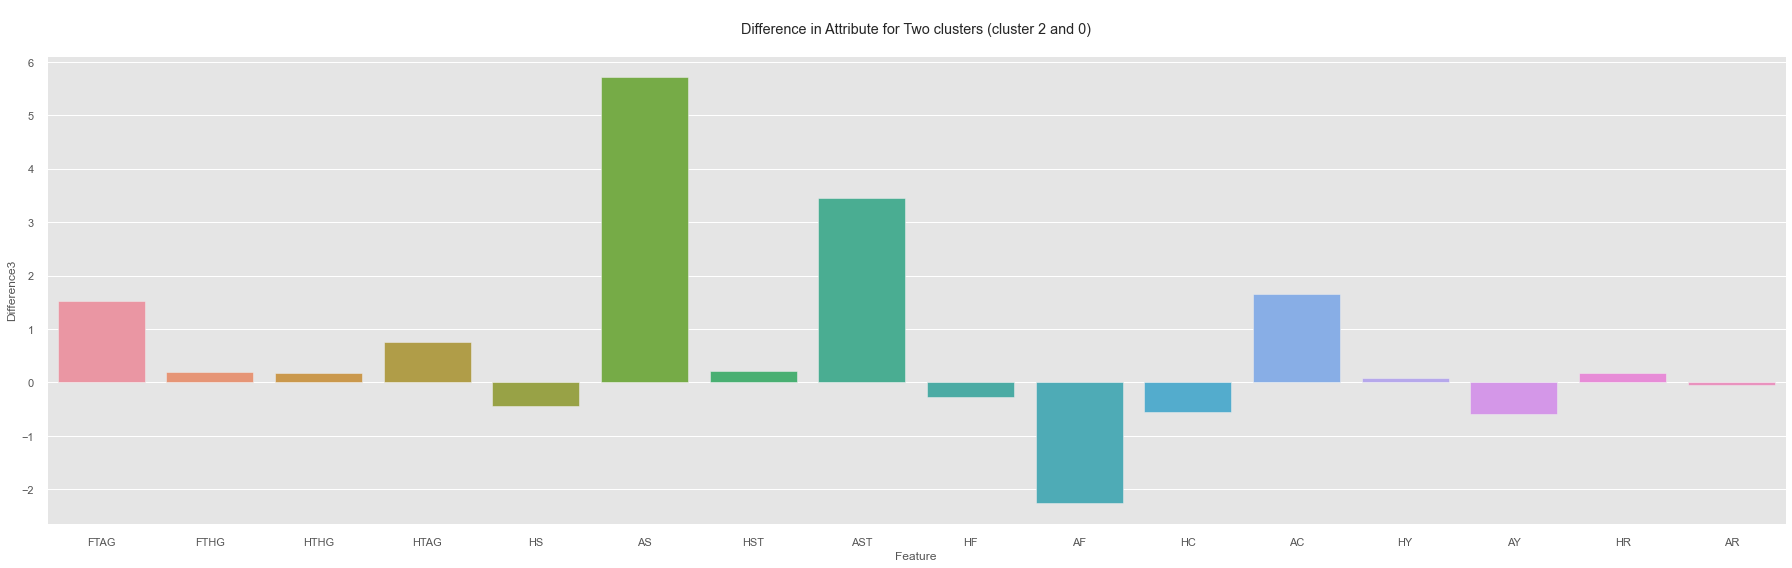

In [899]:
# plotting the difference graph

plt.figure(figsize = (25, 8))
sns.barplot(x = 'Feature', y = 'Difference1', data=diff_frame)
plt.title("\nDifference in Attribute for Two clusters (cluster 0 and 1)\n")
plt.show()
plt.figure(figsize = (25, 8))
sns.barplot(x = 'Feature', y = 'Difference2', data=diff_frame)
plt.title("\nDifference in Attribute for Two clusters (cluster 1 and 2)\n")
plt.show()
plt.figure(figsize = (25, 8))
sns.barplot(x = 'Feature', y = 'Difference3', data=diff_frame)
plt.title("\nDifference in Attribute for Two clusters (cluster 2 and 0)\n")
plt.tight_layout()

,FTAG,FTHG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,cluster_label,Target
0,2,3,2,1,28,9,11,3,18,12,10,3,2,2,0,0,1,Home Win
1,0,1,0,0,17,16,8,2,16,17,7,8,1,4,0,0,0,Home Win
2,0,0,0,0,20,7,5,1,9,11,12,2,2,2,0,1,1,Draw
3,0,1,0,0,14,8,4,1,11,18,6,3,2,6,0,0,0,Home Win
4,0,3,1,0,8,16,4,3,16,8,4,5,4,4,0,0,0,Home Win


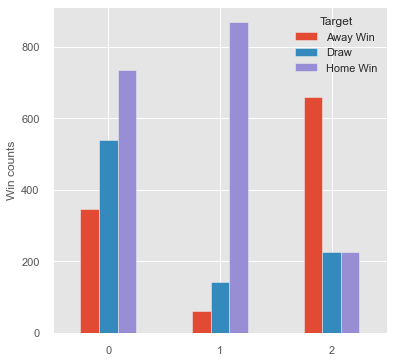

In [901]:
plt.style.use('ggplot')
for_cluster['Target'] = df_for_corr['Target'].apply(lambda x: 'Home Win' if x == 0 else ('Away Win' if x == 1 else 'Draw'))

#plt.figure(figsize=(10,10))
pd.DataFrame(for_cluster.groupby(['cluster_label', 'Target'])['Target'].count().unstack().reset_index(drop=True)).plot(kind='bar')
plt.ylabel("Win counts")
plt.xticks(rotation = 0)

for_cluster.head()

In [684]:
# Eliminating full time goals to check the prediction of a match with goals scored in half time.

df_half_time = df_for_corr[['HTHG','HTAG','HY','AY','HR','AR','Target']]

In [234]:

from scipy.stats import chi2_contingency
for_lda = df_for_corr[['HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Target']]

n = for_lda.iloc[0:3800]
d = for_lda.iloc[:,0:13]
c = 3

n = int(np.array(n))
d = int(np.array(d))
data = np.random.randint(c, size=(n, d))
data = pd.DataFrame(data, columns=[['HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Target']])

# Contingency table.
contingency = pd.crosstab(data['HS'], data['AS'])

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency)

print(c, p, dof, expected)
contingency

TypeError: only size-1 arrays can be converted to Python scalars

In [685]:
### Prediction using half time goals results

X = df_half_time.iloc[:,:-1].values
y = df_half_time.iloc[:,6].values

# standardise the x_train and x_test to scale the features under same values

scalar = StandardScaler()
standardised_df = scalar.fit_transform(df_half_time)
standardised_df = pd.DataFrame(standardised_df,columns = df_half_time.columns)
standardised_df.head()

,HTHG,HTAG,HY,AY,HR,AR,Target
0,1.497354,0.695243,-0.300910,-0.479517,-0.350913,-0.403236,-0.931411
1,-0.824125,-0.689413,-0.973929,0.845212,-0.350913,-0.403236,-0.931411
2,-0.824125,-0.689413,-0.300910,-0.479517,-0.350913,2.048440,1.529042
3,-0.824125,-0.689413,-0.300910,2.169942,-0.350913,-0.403236,-0.931411
4,0.336615,-0.689413,1.045127,0.845212,-0.350913,-0.403236,-0.931411


(AC       1.880763e-01
 AY       7.390016e-02
 AF       2.699888e-02
 HC       4.269078e-03
 HF       2.236485e-04
 AR       3.344043e-12
 HY       1.683288e-12
 HR       4.401284e-16
 HS       5.014791e-35
 AS       1.995378e-66
 HTAG    1.324204e-160
 HST     2.317440e-178
 HTHG    4.772802e-182
 AST     3.486408e-200
 FTHG     0.000000e+00
 FTAG     0.000000e+00
 dtype: float64,
 (array([1855.85208089, 1905.29400437,  835.01510694,  736.26560727,
          157.9561732 ,  302.55956509,  818.03936651,  918.53629312,
           16.81087006,    7.22391971,   10.91271484,    3.34181468,
           54.22054394,    5.21008067,   70.71893053,   52.84768134]),
  array([0.00000000e+000, 0.00000000e+000, 4.77280154e-182, 1.32420363e-160,
         5.01479054e-035, 1.99537818e-066, 2.31744039e-178, 3.48640821e-200,
         2.23648479e-004, 2.69988810e-002, 4.26907791e-003, 1.88076339e-001,
         1.68328821e-012, 7.39001563e-002, 4.40128358e-016, 3.34404263e-012])))

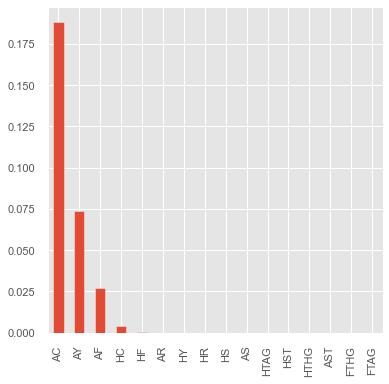

In [889]:

from sklearn.feature_selection import chi2
chi = df_for_corr[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
X = pd.DataFrame(X, columns=['HTHG','HTAG','HY','AY','HR','AR'])
y = pd.DataFrame(y, columns=['Target'])
chi_scores = chi2(chi,y)
p_values = pd.Series(chi_scores[1],index = chi.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

p_values, chi_scores


In [895]:
corr = df[['AS','HS','AST','HST']].corr()
corr

,AS,HS,AST,HST
AS,1.000000,-0.251880,0.681851,-0.169296
HS,-0.251880,1.000000,-0.152473,0.679269
AST,0.681851,-0.152473,1.000000,-0.138153
HST,-0.169296,0.679269,-0.138153,1.000000


In [857]:
# splitting data into train, validation and test sets


X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(standardised_df, target = 'Target', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1, random_state=32)

print(X_train.shape),print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

# label encoding to avoid continuous values
y_train = LabelEncoder().fit_transform(y_train)
y_valid = LabelEncoder().fit_transform(y_valid)
y_test = LabelEncoder().fit_transform(y_test)

(2660, 6)
(2660,)
(760, 6)
(760,)
(380, 6)
(380,)


variance: [0.95504705 0.04495295]
Feature name: ['lineardiscriminantanalysis0' 'lineardiscriminantanalysis1']


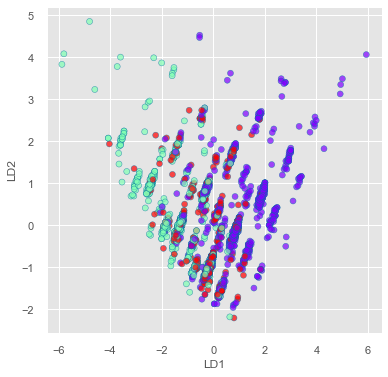

In [687]:
# linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train,y_train)
print('variance:',lda.explained_variance_ratio_)
print('Feature name:',lda.get_feature_names_out())

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

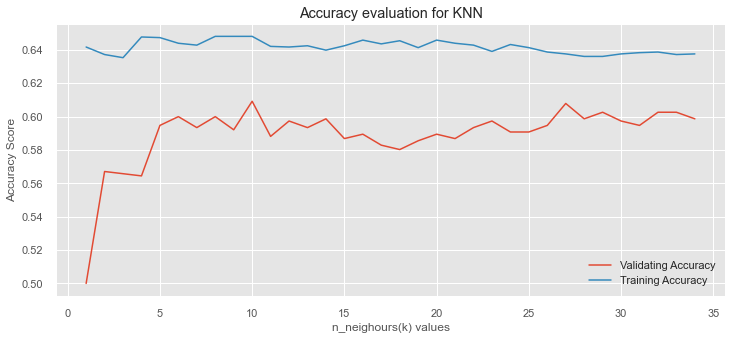

In [690]:
#Tuning k parameter

neighbors = np.arange(1,35)
validating_accuracy = np.empty(len(neighbors))
training_accuracy = np.empty(len(neighbors))
testing_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_classifer = KNeighborsClassifier(n_neighbors=k)
    knn_classifer.fit(X_train, y_train)
    y_pred = knn_classifer.predict(X_valid)

    # storing testing acccuracy
    validating_accuracy[i] = accuracy_score(y_valid,y_pred)
    # storing training accuracy
    training_accuracy[i] = knn_classifer.score(X_train,y_train)

# plotting accuracy values
plt.figure(figsize=(12,5))
plt.title("Accuracy evaluation for KNN")
plt.plot(neighbors, validating_accuracy, label = "Validating Accuracy")
plt.plot(neighbors, training_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("n_neighours(k) values")    
plt.ylabel("Accuracy Score")
plt.show()

In [689]:
from sklearn.model_selection import GridSearchCV
# grid search for k-nn

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

parameters = dict(leaf_size = leaf_size,n_neighbors = n_neighbors, p=p)

knn_classifer = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator=knn_classifer, param_grid=parameters, cv=5,scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print('best estimator:',knn_grid.best_estimator_)
print('best params:',knn_grid.best_params_)
print('best score:',knn_grid.best_score_)


best estimator: KNeighborsClassifier(leaf_size=2, n_neighbors=28, p=1)
best params: {'leaf_size': 2, 'n_neighbors': 28, 'p': 1}
best score: 0.6090225563909775


              precision    recall  f1-score   support

           0       0.67      0.79      0.72       381
           1       0.59      0.63      0.61       207
           2       0.37      0.19      0.25       172

    accuracy                           0.61       760
   macro avg       0.54      0.53      0.53       760
weighted avg       0.58      0.61      0.58       760

accuracy =  0.6092105263157894
precision =  0.5346973606728548
recall =  0.5402691475021163
f1 =  0.5255741818241818


(0.6092105263157894,
 0.5346973606728548,
 0.5402691475021163,
 0.5255741818241818)

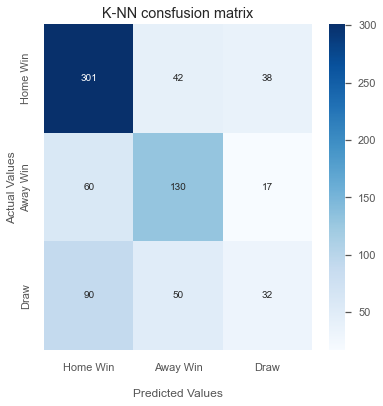

In [858]:
# fitting the dataset into the model and assigning neighours or K value = 5, as it is the standard value to give initially

knn_classifer = KNeighborsClassifier(n_neighbors=10,p=2)

# training the model with training dataset and labels
history = knn_classifer.fit(X_train,y_train)

# predicting the output using x_test
y_pred = knn_classifer.predict(X_valid)

matrix(y_valid, y_pred, "K-NN consfusion matrix")
evaluate(y_valid, y_pred)

# changing the neighbours or k value to obtain better accuracy

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       178
           1       0.63      0.59      0.61       108
           2       0.44      0.26      0.32        94

    accuracy                           0.63       380
   macro avg       0.58      0.57      0.56       380
weighted avg       0.61      0.63      0.61       380

accuracy =  0.631578947368421
precision =  0.5672814419328085
recall =  0.5828661437572328
f1 =  0.5636022492889693
0 ROC AUC OvR: 0.8386
1 ROC AUC OvR: 0.8088
2 ROC AUC OvR: 0.6684
average ROC AUC OvR: 0.7719
Training accuracy: 0.6481203007518797


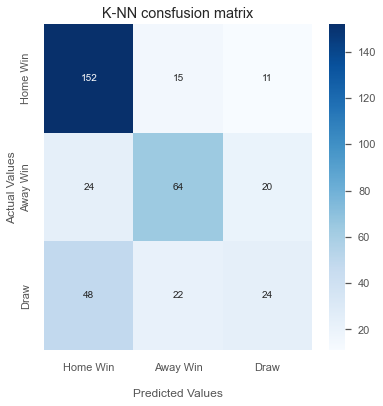

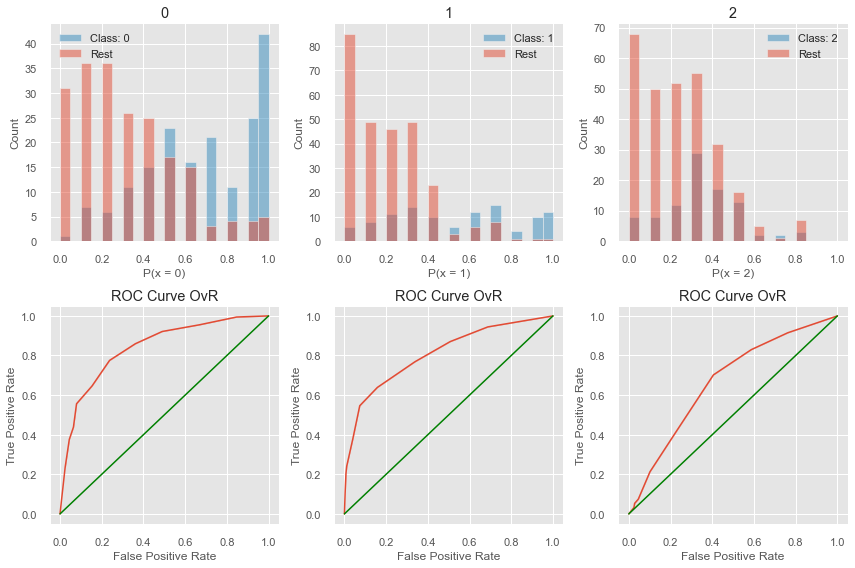

In [859]:
# validating the KNN result obtained using testing set

# predicting the output using x_test
y_pred = knn_classifer.predict(X_test)

matrix(y_test, y_pred, "K-NN consfusion matrix")
evaluate(y_test, y_pred)
roc(knn_classifer)


print("Training accuracy:",knn_classifer.score(X_train, y_train))


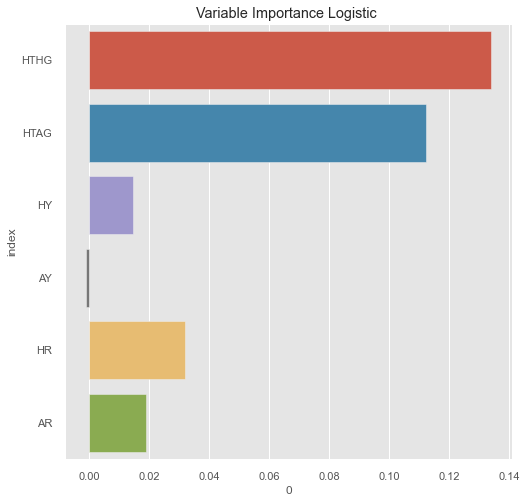

In [722]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    knn_classifer, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

importance_KNN = pd.DataFrame([forest_importances], columns = X_test.columns).T.reset_index()
plt.figure(figsize = (8,8))
sns.barplot(x = 0, y = 'index', data = importance_KNN).set_title("Variable Importance Logistic ");

In [860]:
# splitting data into train, validation and test sets

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_half_time, target = 'Target', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1, random_state=32)

print(X_train.shape),print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

# label encoding to avoid continuous values
y_train = LabelEncoder().fit_transform(y_train)
y_valid = LabelEncoder().fit_transform(y_valid)
y_test = LabelEncoder().fit_transform(y_test)

(2660, 6)
(2660,)
(760, 6)
(760,)
(380, 6)
(380,)


>1 0.582 (0.019)
>2 0.582 (0.019)
>3 0.582 (0.018)
>4 0.584 (0.018)
>5 0.581 (0.018)
>6 0.580 (0.016)
>7 0.581 (0.018)


AttributeError: 'Line2D' object has no property 'labels'

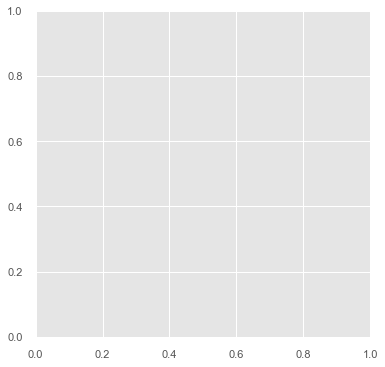

In [651]:
# exploring the no. of features to reduced over fitting in random forest


def get_models():
    models = dict()
    for i in range(1,8):
        models[str(i)] = RandomForestClassifier(max_features = i)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=6,n_repeats = 5, random_state=1)
    score = cross_val_score(model,X,y,cv=cv,n_jobs=1,scoring = 'accuracy')
    return score


results, names = list(),list()
models = get_models()
for name, model in models.items():

    scores = evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)

    print('>%s %.3f (%.3f)' % (name, mean(scores), stdev(scores)))


plt.style.use('ggplot')
plt.plot(results, labels = names)
plt.xlabel("max features")
plt.ylabel("accuracy score")
plt.title("Hyperparameter tune for features")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 110)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred = forest_classifer.predict(X_valid)

print("Accuracy on test data", accuracy_score(y_valid,y_pred))
print("Accuracy on train data", forest_classifer.score(X_train, y_train))

print('best params:',rf_random.best_params_)
print('best score:',rf_random.best_score_)



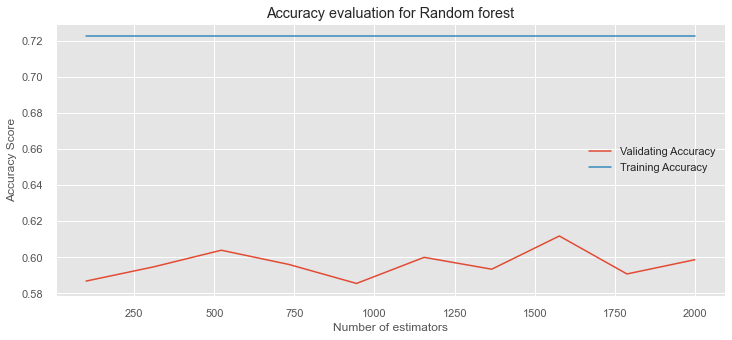

In [732]:
# hyper parameter tuning for estimators
estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

validating_accuracy = list()
training_accuracy = list()
for i in estimators:
    forest_classifer = RandomForestClassifier(n_estimators=i)
    forest_classifer.fit(X_train, y_train)
    y_pred = forest_classifer.predict(X_valid)

    # storing testing acccuracy
    validating_accuracy.append(accuracy_score(y_valid,y_pred))
    # storing training accuracy
    training_accuracy.append(forest_classifer.score(X_train,y_train))

# plotting accuracy values
plt.figure(figsize=(12,5))
plt.title("Accuracy evaluation for Random forest")
plt.plot(estimators, validating_accuracy, label = "Validating Accuracy")
plt.plot(estimators, training_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("Number of estimators")    
plt.ylabel("Accuracy Score")
plt.show()


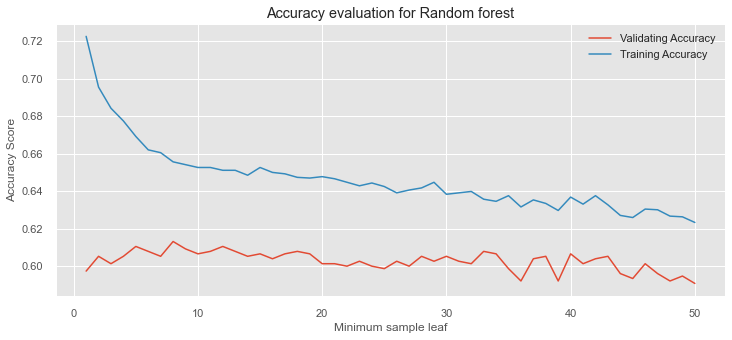

In [734]:
# hyper parameter tuning for min_sample_leaf
sample_leaf = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]

validating_accuracy = list()
training_accuracy = list()
for i in sample_leaf:
    forest_classifer = RandomForestClassifier(min_samples_leaf=i)
    forest_classifer.fit(X_train, y_train)
    y_pred = forest_classifer.predict(X_valid)

    # storing testing acccuracy
    validating_accuracy.append(accuracy_score(y_valid,y_pred))
    # storing training accuracy
    training_accuracy.append(forest_classifer.score(X_train,y_train))

# plotting accuracy values
plt.figure(figsize=(12,5))
plt.title("Accuracy evaluation for Random forest")
plt.plot(sample_leaf, validating_accuracy, label = "Validating Accuracy")
plt.plot(sample_leaf, training_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("Minimum sample leaf")    
plt.ylabel("Accuracy Score")
plt.show()

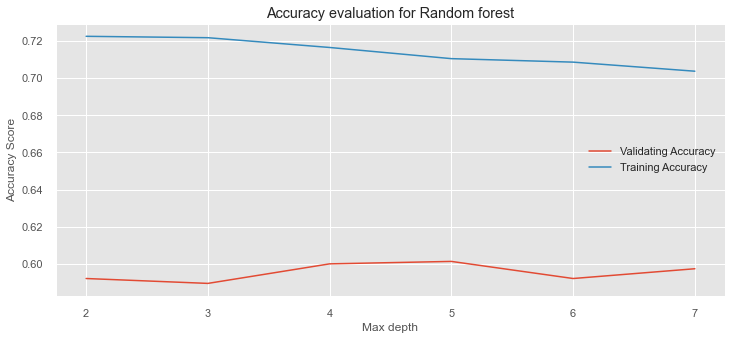

In [738]:
# hyper parameter tuning for min_sample_leaf
depth = [2,3,4,5,6,7]

validating_accuracy = list()
training_accuracy = list()
for i in depth:
    forest_classifer = RandomForestClassifier(min_samples_split=i)
    forest_classifer.fit(X_train, y_train)
    y_pred = forest_classifer.predict(X_valid)

    # storing testing acccuracy
    validating_accuracy.append(accuracy_score(y_valid,y_pred))
    # storing training accuracy
    training_accuracy.append(forest_classifer.score(X_train,y_train))

# plotting accuracy values
plt.figure(figsize=(12,5))
plt.title("Accuracy evaluation for Random forest")
plt.plot(depth, validating_accuracy, label = "Validating Accuracy")
plt.plot(depth, training_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("Max depth")    
plt.ylabel("Accuracy Score")
plt.show()

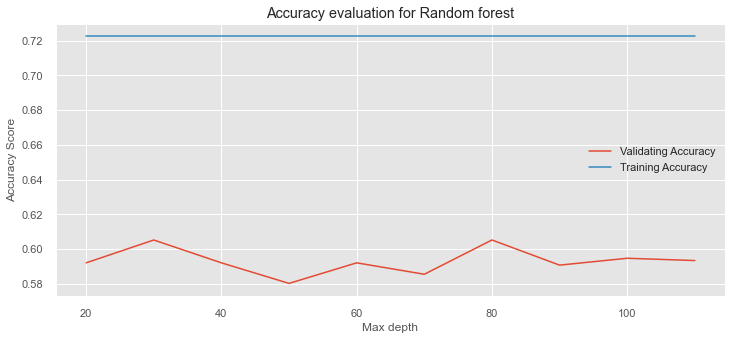

In [739]:
# hyper parameter tuning for min_sample_leaf
depth = [20,30,40,50,60,70,80,90,100,110]

validating_accuracy = list()
training_accuracy = list()
for i in depth:
    forest_classifer = RandomForestClassifier(max_depth=i)
    forest_classifer.fit(X_train, y_train)
    y_pred = forest_classifer.predict(X_valid)

    # storing testing acccuracy
    validating_accuracy.append(accuracy_score(y_valid,y_pred))
    # storing training accuracy
    training_accuracy.append(forest_classifer.score(X_train,y_train))

# plotting accuracy values
plt.figure(figsize=(12,5))
plt.title("Accuracy evaluation for Random forest")
plt.plot(depth, validating_accuracy, label = "Validating Accuracy")
plt.plot(depth, training_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("Max depth")    
plt.ylabel("Accuracy Score")
plt.show()

Accuracy on test data 0.5973684210526315
Accuracy on train data 0.6522556390977443


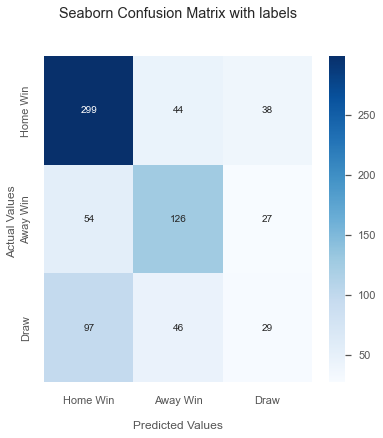

[0.42947995 0.3409779  0.0896357  0.07793996 0.03467013 0.02729637]
accuracy =  0.5973684210526315
precision =  0.5206924020746143
recall =  0.5187628053585501
f1 =  0.5111349051380017
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       381
           1       0.58      0.61      0.60       207
           2       0.31      0.17      0.22       172

    accuracy                           0.60       760
   macro avg       0.52      0.52      0.51       760
weighted avg       0.56      0.60      0.57       760



In [861]:
# building random forest classifer

forest_classifer = RandomForestClassifier(n_estimators=1600, bootstrap=True, min_samples_leaf=8, random_state=42, max_features = 'sqrt', min_samples_split=5, max_depth=30, n_jobs=-1)

forest_classifer.fit(X_train, y_train)
y_pred = forest_classifer.predict(X_valid)

print("Accuracy on test data", accuracy_score(y_valid,y_pred))
print("Accuracy on train data", forest_classifer.score(X_train, y_train))

cm = confusion_matrix(y_valid, y_pred)

cm_df = pd.DataFrame(cm, index=['Home Win','Away Win','Draw'],columns=['Home Win','Away Win','Draw'])
#Plotting the confusion matrix

ax = sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Display the visualization of the Confusion Matrix.
plt.show()

print(forest_classifer.feature_importances_)
evaluate(y_valid, y_pred)


# Classification table 
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       178
           1       0.65      0.67      0.66       108
           2       0.42      0.22      0.29        94

    accuracy                           0.63       380
   macro avg       0.58      0.57      0.57       380
weighted avg       0.61      0.63      0.61       380

accuracy =  0.6342105263157894
precision =  0.5738438653810397
recall =  0.5824242424242424
f1 =  0.5653119061156958
0 ROC AUC OvR: 0.8541
1 ROC AUC OvR: 0.8359
2 ROC AUC OvR: 0.7039
average ROC AUC OvR: 0.7979


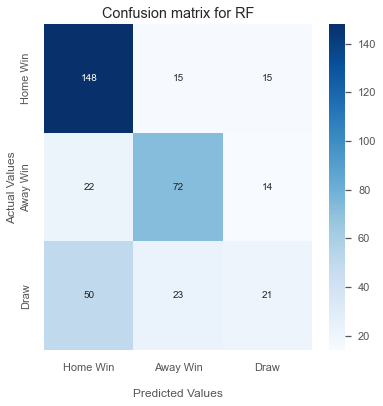

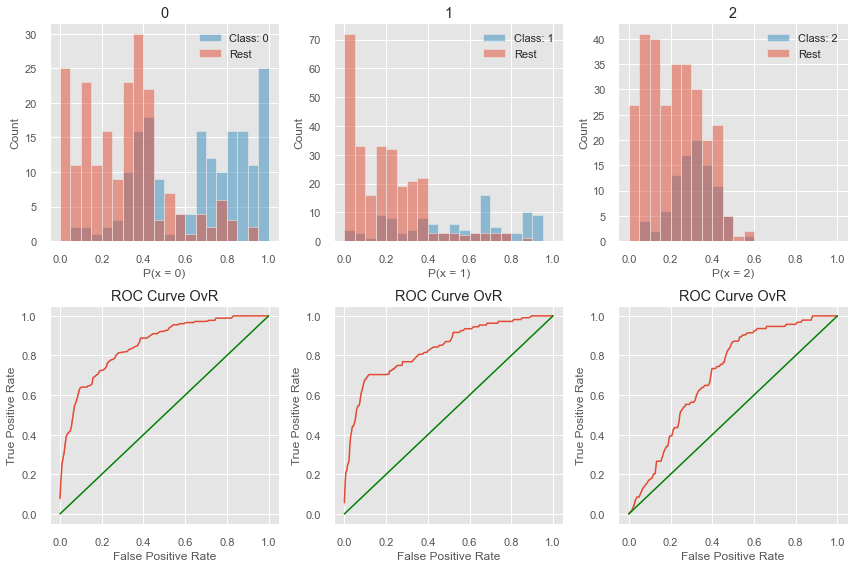

In [862]:
# validating random forest result obtained using testing set

# predicting the output using x_test
y_pred = forest_classifer.predict(X_test)

matrix(y_test, y_pred,"Confusion matrix for RF")
evaluate(y_test, y_pred)
roc(forest_classifer)


HTHG    0.134211
HTAG    0.112368
HY      0.014737
AY     -0.001053
HR      0.032105
dtype: float64

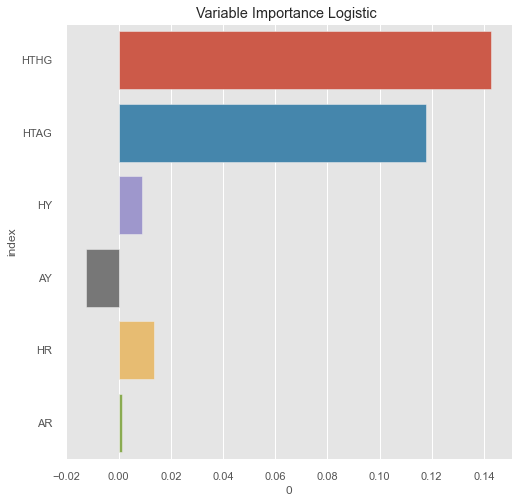

In [755]:
# calculating the important variables for the predictors

result = permutation_importance(
    forest_classifer, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

importance_forest = pd.DataFrame([result.importances_mean], columns = X_test.columns).T.reset_index()
plt.figure(figsize = (8,8))
sns.barplot(x = 0, y = 'index', data = importance_forest).set_title("Variable Importance Logistic ");

forest_importances.head()

In [647]:
# decision tree classifier

tree_classifer = DecisionTreeClassifier(criterion='gini',random_state=42, max_leaf_nodes=7)
tree_classifer.fit(X_train,y_train)
y_pred = tree_classifer.predict(X_valid)

print("Predicted value:", y_pred)

# To check the accuracy
print("Valid accuracy:",accuracy_score(y_valid,y_pred))
print("Train accuracy:",tree_classifer.score(X_train,y_train))

# Confusion matrix
print(classification_report(y_valid,y_pred))

Predicted value: [1 0 2 2 2 1 2 1 0 2 0 2 1 2 1 1 1 1 2 1 1 1 1 1 2 2 0 1 0 1 0 0 1 1 2 0 2
 1 0 0 0 0 2 2 2 2 1 1 2 0 0 1 2 1 2 2 1 0 1 0 0 0 1 1 1 0 0 0 1 2 0 1 1 2
 0 1 1 2 0 1 0 2 0 2 0 0 0 2 1 2 0 0 0 2 0 0 1 0 1 1 1 0 1 0 2 0 1 0 0 1 1
 1 0 1 1 2 1 2 2 0 1 2 1 2 0 2 2 0 1 2 1 0 0 1 2 2 2 0 1 0 0 0 2 1 2 0 0 1
 2 0 2 2 2 1 1 0 2 0 1 1 1 0 2 1 1 2 0 2 1 2 1 1 0 0 0 0 0 0 1 1 2 0 1 1 1
 2 2 2 2 1 1 0 0 0 1 2 2 1 0 2 0 2 1 2 0 1 2 0 1 1 1 0 0 0 0 2 0 2 2 1 0 0
 2 1 2 1 0 0 2 0 0 1 0 1 2 0 1 1 2 1 2 1 2 2 1 1 0 0 0 1 2 0 0 1 1 1 0 1 1
 1 1 1 0 1 2 0 2 2 1 2 2 0 2 0 2 2 1 1 2 1 0 0 2 2 0 1 1 2 2 0 1 2 1 0 0 1
 2 2 1 1 1 2 1 2 2 2 1 2 1 2 1 0 2 0 1 1 2 2 1 2 2 1 0 1 0 1 1 1 1 0 0 1 1
 0 1 0 2 0 2 0 1 1 2 1 1 0 2 1 2 1 2 2 0 2 0 0 0 1 1 1 0 1 2 1 1 0 0 0 2 1
 1 1 0 2 0 1 1 0 2 0 0 2 0 2 2 2 2 0 2 0 0 2 1 0 0 0 1 1 1 0 2 1 2 2 2 2 1
 2 1 1 0 1 0 0 2 0 2 2 1 2 1 1 1 1 1 0 0 0 1 1 2 2 0 2 1 1 1 0 2 1 2 2 1 2
 1 0 0 2 0 2 1 0 2 1 0 0 0 1 1 2 0 1 0 1 0 1 0 1 1 0 0 1 1 1 2 0 2 1 1 0 2
 2 1 2 2

In [ ]:
# validating with test data

y_pred = tree_classifer.predict(X_test)
# To check the accuracy
print("Test accuracy:",accuracy_score(y_test,y_pred))

# Confusion matrix
print(classification_report(y_test,y_pred))

In [863]:
# splitting data into train, validation and test sets

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(standardised_df, target = 'Target', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1, random_state=42)

print(X_train.shape),print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

# label encoding to avoid continuous values
y_train = LabelEncoder().fit_transform(y_train)
y_valid = LabelEncoder().fit_transform(y_valid)
y_test = LabelEncoder().fit_transform(y_test)

(2660, 6)
(2660,)
(760, 6)
(760,)
(380, 6)
(380,)


[LibSVM].
*.
*
optimization finished, #iter = 2223
obj = -620.164445, rho = 0.262552
nSV = 741, nBSV = 606
Total nSV = 741
.
*.
*
optimization finished, #iter = 2985
obj = -596.180611, rho = 0.221932
nSV = 725, nBSV = 581
Total nSV = 725
.
*
optimization finished, #iter = 1884
obj = -643.344517, rho = 0.103131
nSV = 756, nBSV = 637
Total nSV = 756
.
**.
*
optimization finished, #iter = 1987
obj = -642.110040, rho = 0.191053
nSV = 756, nBSV = 630
Total nSV = 756
.
*.
*
optimization finished, #iter = 2948
obj = -654.631433, rho = 0.181265
nSV = 778, nBSV = 639
Total nSV = 778
.
*.
*
optimization finished, #iter = 2706
obj = -784.328387, rho = -0.200725
nSV = 931, nBSV = 768
.
*.*
optimization finished, #iter = 2143
obj = -894.194756, rho = 0.301956
nSV = 1016, nBSV = 880
Total nSV = 1016
.
*.
*
optimization finished, #iter = 2796
obj = -897.618795, rho = 0.505465
nSV = 1006, nBSV = 886
Total nSV = 1006
.
*.
*
optimization finished, #iter = 2624
obj = -904.018557, rho = 0.461444
nSV = 101

(0.6131578947368421,
 0.5392352369959141,
 0.5737383971426525,
 0.5309188929532603)

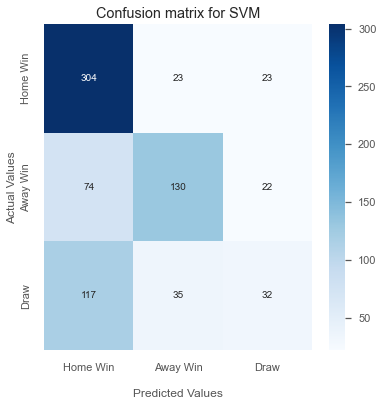

In [864]:
# Support vector machine



svm_clf = SVC(kernel='rbf',gamma='scale',random_state=1, verbose=2, probability=True)
svm_clf.fit(X_train,y_train)

# to predict
y_pred = svm_clf.predict(X_valid)

print('............................')
print("valid data accuracy:", accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))
print("Train data accuracy:", svm_clf.score(X_train,y_train))

matrix(y_valid, y_pred,"Confusion matrix for SVM")
evaluate(y_valid, y_pred)



              precision    recall  f1-score   support

           0       0.58      0.86      0.70       170
           1       0.67      0.63      0.65       107
           2       0.40      0.12      0.18       103

    accuracy                           0.59       380
   macro avg       0.55      0.53      0.51       380
weighted avg       0.56      0.59      0.54       380

accuracy =  0.5921052631578947
precision =  0.533832202693254
recall =  0.5513333333333333
f1 =  0.5076774060755754
0 ROC AUC OvR: 0.7897
1 ROC AUC OvR: 0.8007
2 ROC AUC OvR: 0.5573
average ROC AUC OvR: 0.7159
Train data accuracy: 0.6537593984962407


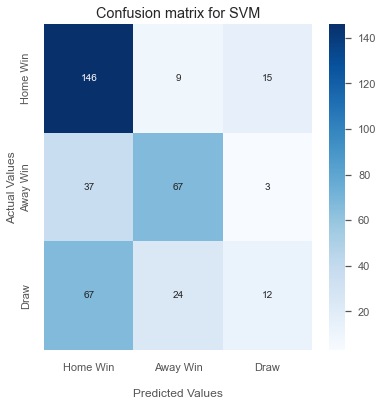

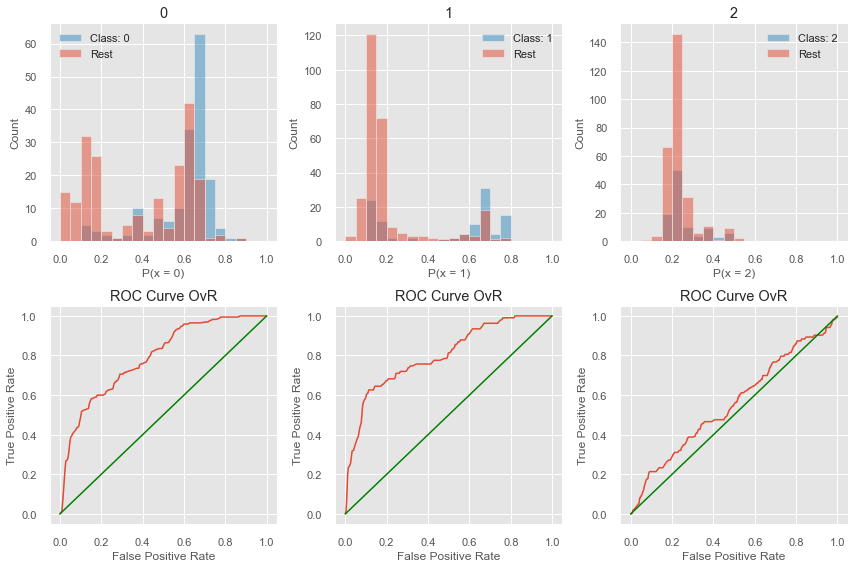

In [865]:
# validating the SVM result obtained using testing set

# predicting the output using x_test
y_pred = svm_clf.predict(X_test)

matrix(y_test, y_pred,"Confusion matrix for SVM")
evaluate(y_test, y_pred)
roc(svm_clf)
print("Train data accuracy:", svm_clf.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.57      0.93      0.71       170
           1       0.68      0.62      0.65       107
           2       0.50      0.04      0.07       103

    accuracy                           0.60       380
   macro avg       0.58      0.53      0.48       380
weighted avg       0.58      0.60      0.52       380

accuracy =  0.6
precision =  0.5283563820229117
recall =  0.5849859418931583
f1 =  0.47641441838401516
Train data accuracy: 0.6263157894736842


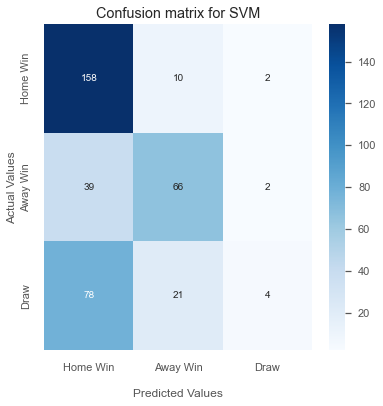

In [773]:
# validating the SVM result obtained using testing set

# predicting the output using x_test
y_pred = svm_clf.predict(X_test)

matrix(y_test, y_pred,"Confusion matrix for SVM")
evaluate(y_test, y_pred)
print("Train data accuracy:", svm_clf.score(X_train,y_train))

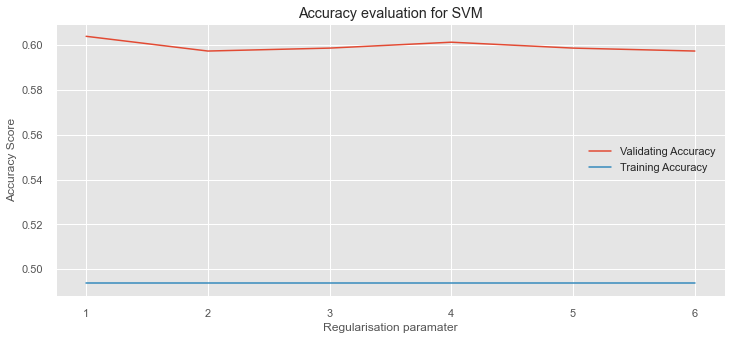

[0.6039473684210527, 0.5973684210526315, 0.5986842105263158, 0.6013157894736842, 0.5986842105263158, 0.5973684210526315]


In [774]:
c = [1,2,3,4,5,6]
validating_accuracy = list()
training_accuracy = list()
for i in c:
# to predict
    svm_clf = SVC(kernel='linear',C=i, random_state=42)
    svm_clf.fit(X_train,y_train)

    y_pred = svm_clf.predict(X_valid)

    # storing testing acccuracy
    validating_accuracy.append(accuracy_score(y_valid,y_pred))
    # storing training accuracy
    training_accuracy.append(forest_classifer.score(X_train,y_train))

# plotting accuracy values
plt.figure(figsize=(12,5))
plt.title("Accuracy evaluation for SVM")
plt.plot(c, validating_accuracy, label = "Validating Accuracy")
plt.plot(c, training_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("Regularisation paramater")    
plt.ylabel("Accuracy Score")
plt.show()
print(validating_accuracy)



[LibSVM].
*
optimization finished, #iter = 1015
obj = -832.779217, rho = -1.175040
nSV = 864, nBSV = 814
.
*
optimization finished, #iter = 1906
obj = -1206.318165, rho = -0.446608
nSV = 1220, nBSV = 1193
.
*
optimization finished, #iter = 1385
obj = -956.715112, rho = 0.376870
nSV = 979, nBSV = 945
Total nSV = 1758
............................
valid data accuracy: 0.6039473684210527
              precision    recall  f1-score   support

           0       0.58      0.93      0.72       350
           1       0.72      0.56      0.63       226
           2       0.30      0.04      0.08       184

    accuracy                           0.60       760
   macro avg       0.53      0.51      0.47       760
weighted avg       0.55      0.60      0.53       760

Train data accuracy: 0.6263157894736842
              precision    recall  f1-score   support

           0       0.58      0.93      0.72       350
           1       0.72      0.56      0.63       226
           2       0.30      

(0.6039473684210527,
 0.5098572711115997,
 0.5329111907606531,
 0.47337244746801943)

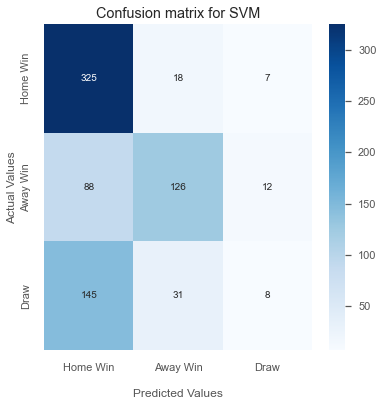

In [772]:
svm_clf = SVC(kernel='linear',C = 1,random_state=1, verbose=2)
svm_clf.fit(X_train,y_train)

# to predict
y_pred = svm_clf.predict(X_valid)

print('............................')
print("valid data accuracy:", accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))
print("Train data accuracy:", svm_clf.score(X_train,y_train))

matrix(y_valid, y_pred,"Confusion matrix for SVM")
evaluate(y_valid, y_pred)

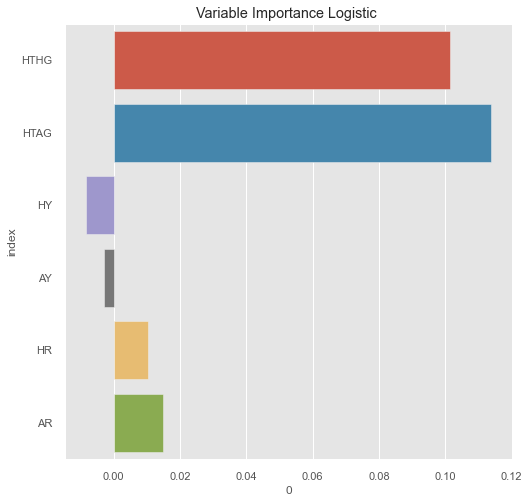

In [777]:
# calculating the important variables for the predictors

result = permutation_importance(
    svm_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

importance_svm = pd.DataFrame([result.importances_mean], columns = X_test.columns).T.reset_index()
plt.figure(figsize = (8,8))
sns.barplot(x = 0, y = 'index', data = importance_svm).set_title("Variable Importance Logistic ");

In [ ]:
# Accuracy comparison

acc_score = [63, 63, 63, 61]
labels = ['k-NN', 'Random Forest', 'Decision Tree', 'SVM']

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
sns_acc = sns.barplot(labels, y=acc_score)
sns_acc.set_title("Accuracy Plot")
sns_acc.set_xlabel("Model")
sns_acc.set_ylabel("Accuracy score")
sns_acc.set_ylim(0,80)
plt.show()

In [ ]:
# Ensemble model adaboost


def boost(model, X_train, y_train, X_valid, y_valid, X_test, y_test):
    ada_classifer = model.fit(X_train, y_train)
    y_pred1 = ada_classifer.predict(X_valid)

    # evaluating the performance
    print("On validation data")
    evaluate(y_valid, y_pred1)

    # to validate the result on test set
    y_pred2 = ada_classifer.predict(X_test)
    # evaluating the performance
    print("On Test data")
    evaluate(y_valid, y_pred1)
    matrix(y_valid, y_pred1)
    return ada_classifer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost with SVM
boost(AdaBoostClassifier(SVC(probability=True), n_estimators=100, learning_rate=0.001,random_state=42), X_train, y_train, X_valid, y_valid, X_test, y_test)

On validation data
accuracy =  0.6197368421052631
precision =  0.528451564467822
recall =  0.5514444444444444
f1 =  0.5152613793558645
On Test data
accuracy =  0.6197368421052631
precision =  0.528451564467822
recall =  0.5514444444444444
f1 =  0.5152613793558645
              precision    recall  f1-score   support

           0       0.65      0.85      0.73       381
           1       0.62      0.60      0.61       207
           2       0.38      0.13      0.20       172

    accuracy                           0.62       760
   macro avg       0.55      0.53      0.52       760
weighted avg       0.58      0.62      0.58       760



GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [60, 70, 80], 'max_features': ['sqrt'],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 355, 511, 666, 822, 977, 1133,
                                          1288, 1444, 1600],
                         'warm_start': [True, False]},
             scoring='accuracy')

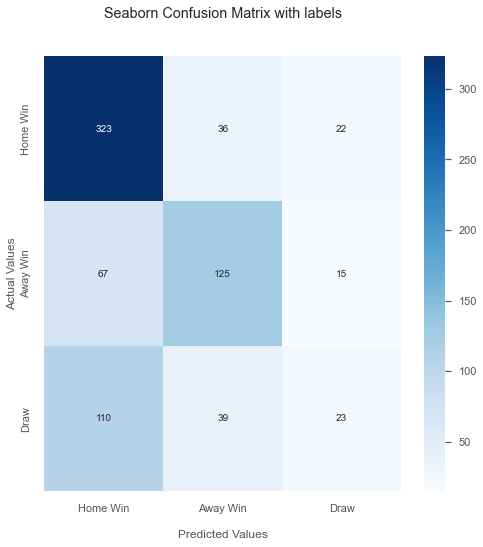

In [90]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = dict(learning_rate = [0.1,0.01,0.001],
                n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1600, num = 10)],
                min_samples_split = [2,4,6],
                warm_start = [True, False],
                min_samples_leaf = [40,50,60],
                max_features = ['sqrt'],
                max_depth = [60,70,80])

#XG boost
boost(GridSearchCV(estimator=GradientBoostingClassifier(),cv=2,param_grid=params,scoring='accuracy',n_jobs=-1),X_train, y_train, X_valid, y_valid, X_test, y_test)
#boost(GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000, min_samples_split=2,warm_start = True, min_samples_leaf=40, random_state=42, max_features='sqrt', max_depth=70),X_train, y_train, X_valid, y_valid, X_test, y_test)

In [ ]:
# bagging classifier for svm

from sklearn.ensemble import BaggingClassifier

boost(BaggingClassifier(base_estimator=SVC(),n_estimators=1000, bootstrap=True, max_samples=1.0,max_features=7,bootstrap_features=True,n_jobs=-1,random_state=42), X_train, y_train, X_valid, y_valid, X_test, y_test)

In [ ]:
# adaboost with random forest
from sklearn.ensemble import AdaBoostClassifier
boost(AdaBoostClassifier(RandomForestClassifier(n_estimators=700, bootstrap=True, min_samples_leaf=40, verbose=2, random_state=42, max_features = 'sqrt', min_samples_split=2, max_depth=70), n_estimators=200, learning_rate=0.001,random_state=42), X_train, y_train, X_valid, y_valid, X_test, y_test)

In [ ]:
# adaboost with random forest
n_neighbors = [1,3,5,7,9,11]

for i in n_neighbors:
    boost(AdaBoostClassifier(KNeighborsClassifier(n_neighbors=i), n_estimators=100, learning_rate=0.1,random_state=42), X_train, y_train, X_valid, y_valid, X_test, y_test)

In [412]:
## Team statistics

team_stats_df = pd.read_excel("Team statistics.xlsx")

In [ ]:
team_stats_df.info()

In [ ]:
team_stats_df.head(20)

#team_stats_df['Team'] = team_stats_df['Team'].apply(lambda x: 'Barcelona' if x == '1. Barcelona' else '1. Barcelona')
for i,k in team_stats_df.iterrows():
    if team_stats_df.iloc[i,1] == '1. Barcelona':
        team_stats_df.iloc[i,1] = 'Barcelona'
    elif team_stats_df.iloc[i,1] == '2. Real Madrid':
        team_stats_df.iloc[i,1] = 'Real Madrid'
    elif team_stats_df.iloc[i,1] == '3. Valencia':
        team_stats_df.iloc[i,1] = 'Valencia'
    elif team_stats_df.iloc[i,1] == '4. Mallorca':
        team_stats_df.iloc[i,1] = 'Mallorca'
    elif team_stats_df.iloc[i,1] == '5. Sevilla':
        team_stats_df.iloc[i,1] = 'Sevilla'
    elif team_stats_df.iloc[i,1] == '6. Athletic Bilbao':
        team_stats_df.iloc[i,1] = 'Athletic Bilbao'
    elif team_stats_df.iloc[i,1] == '7. Villarreal':
        team_stats_df.iloc[i,1] = 'Villarreal'
    elif team_stats_df.iloc[i,1] == '8. Almeria':
        team_stats_df.iloc[i,1] = 'Almeria'
    elif team_stats_df.iloc[i,1] == '9. Getafe':
        team_stats_df.iloc[i,1] = 'Getafe'     
    elif team_stats_df.iloc[i,1] == '10. Malaga':
        team_stats_df.iloc[i,1] = 'Malaga'
    elif team_stats_df.iloc[i,1] == '11. Atletico Madrid':
        team_stats_df.iloc[i,1] = 'Atletico Madri'
    elif team_stats_df.iloc[i,1] == '12. Real Zaragoza':
        team_stats_df.iloc[i,1] = 'Real Zaragoza'
    elif team_stats_df.iloc[i,1] == '13. Racing Santander':
        team_stats_df.iloc[i,1] = 'Racing Santander'
    elif team_stats_df.iloc[i,1] == '14. Tenerife':
        team_stats_df.iloc[i,1] = 'Tenerife'
    elif team_stats_df.iloc[i,1] == '15. Real Valladolid':
        team_stats_df.iloc[i,1] = 'Real Valladolid'
    elif team_stats_df.iloc[i,1] == '16. Sporting Gijon':
        team_stats_df.iloc[i,1] = 'Sporting Gijo'
    elif team_stats_df.iloc[i,1] == '17. Espanyol':
        team_stats_df.iloc[i,1] = 'Espanyol'     
    elif team_stats_df.iloc[i,1] == '18. Osasuna':
        team_stats_df.iloc[i,1] = 'Osasuna'
    elif team_stats_df.iloc[i,1] == '19. Deportivo La Coruna':
        team_stats_df.iloc[i,1] = 'Deportivo La Coruna'     
    elif team_stats_df.iloc[i,1] == '20. Xerez':
        team_stats_df.iloc[i,1] = 'Xerez'

In [ ]:

team_stats_df.head(20)

In [414]:
team_stats_df.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1,inplace=True)

In [ ]:
ax = sns.barplot(x = team_stats_df['Season'], y = team_stats_df['Offsides pg'], data='team_stats_df')
team_stats_df['Goals'].plot(kind = 'line')
plt.title("Season wise offside per game against goals")
plt.show()



In [ ]:
corr = team_stats_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [856]:
def roc(model):


    def calculate_tpr_fpr(y_real, y_pred):
    
        # Calculates the confusion matrix and recover each element
        cm = confusion_matrix(y_real, y_pred)
        TN = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TP = cm[1, 1]
    
        # Calculates tpr and fpr
        tpr =  TP/(TP + FN) # sensitivity - true positive rate
        fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
        return tpr, fpr

    # Plots the Probability Distributions and the ROC Curves One vs Rest

    def get_all_roc_coordinates(y_real, y_proba):
    
        tpr_list = [0]
        fpr_list = [0]
        for i in range(len(y_proba)):
            threshold = y_proba[i]
            y_pred = y_proba >= threshold
            tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
            tpr_list.append(tpr)
            fpr_list.append(fpr)
        return tpr_list, fpr_list

    def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    
        if ax == None:
            plt.figure(figsize = (5, 5))
            ax = plt.axes()
    
        if scatter:
            sns.scatterplot(x = fpr, y = tpr, ax = ax)
        sns.lineplot(x = fpr, y = tpr, ax = ax)
        sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
        plt.xlim(-0.05, 1.05)
        plt.ylim(-0.05, 1.05)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")

    plt.figure(figsize = (12, 8))
    bins = [i/20 for i in range(20)] + [1]
    classes = model.classes_
    y_proba = model.predict_proba(X_test)
    roc_auc_ovr = {}
    for i in range(len(classes)):
        # Gets the class
        c = classes[i]
    
        # Prepares an auxiliar dataframe to help with the plots
        df_aux = X_test.copy()
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = y_proba[:, i]
        df_aux = df_aux.reset_index(drop = True)
        
        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 3, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(c)
        ax.legend([f"Class: {c}", "Rest"])
        ax.set_xlabel(f"P(x = {c})")
    
        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 3, i+4)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvR")
    
        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    plt.tight_layout()

    # Displays the ROC AUC for each class
    avg_roc_auc = 0
    i = 0
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

In [417]:
team_stats_df.drop(['Unnamed: 0'], axis=1, inplace=True)
team_stats_df.head()

,Season,Team,Goals,Possession%,Pass%,AerialsWon,Shots Conceded pg,Tackles pg,Interceptions pg,Fouls pg,Offsides pg,Shots pg,Shots OT pg,Dribbles pg,Fouled pg,Rating
0,Season 09/10,Barcelona,98,63.7,87.0,8.3,8.5,20.3,20.6,13.5,3.6,15.6,6.7,11.7,16.4,7.30
1,Season 09/10,Real Madrid,102,57.0,83.3,9.9,10.3,20.7,21.6,15.4,3.7,21.5,8.6,11.4,16.2,7.27
2,Season 09/10,Valencia,59,54.4,78.3,9.2,12.2,20.9,17.6,16.6,3.4,14.3,5.5,8.4,13.2,6.96
3,Season 09/10,Mallorca,59,46.5,71.5,12.7,11.9,19.7,23.2,17.7,2.5,12.8,4.9,8.5,14.9,6.95
4,Season 09/10,Sevilla,66,52.1,75.0,12.3,12.3,17.1,17.8,15.8,2.2,13.2,4.9,8.2,17.2,6.91


In [424]:
team_stats_df['Pass% pg'] = team_stats_df['Pass%'].apply(lambda x: round(x/38,2))
team_stats_df['possession% pg'] = team_stats_df['Possession%'].apply(lambda x: round(x/38,2))

In [425]:
team_stats_df.to_csv('Team Statistics.csv')